In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# Or more specifically:
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore only deprecation warnings


In [2]:
# Import the libraries you will be using for analysis
# Core data analysis and scientific computing
import numpy as np
import pandas as pd
import scipy.stats as stats


# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Statistical analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Utilities
import os
import warnings
import datetime as dt
from tqdm import tqdm  # For progress bars

# Configure visualizations
%matplotlib inline
#plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner notebook output

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
!pip install pyarrow==13.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 13.0.0 which is incompatible.
cudf-cu12 25.2.1 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 13.0.0 which is incompatible.
dask-expr 1.1.21 requires pyarrow>=14.0.1, but you have pyarrow 13.0.0 which is incompatible.


In [1]:
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.8.4 seaborn==0.13.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
#import os
#os.kill(os.getpid(), 9)

In [ ]:
!pip install pandas glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [1]:
import pandas as pd
import glob

file_list = glob.glob('/content/drive/MyDrive/trip_records/*.parquet') # Add *.parquet to ensure it finds parquet files

df_list = [pd.read_parquet(file) for file in file_list]
df = pd.concat(df_list, ignore_index=True)
print(df.head())
print(df.shape)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-09-01 00:15:37   2023-09-01 00:20:21              1.0   
1         2  2023-09-01 00:18:40   2023-09-01 00:30:28              2.0   
2         2  2023-09-01 00:35:01   2023-09-01 00:39:04              1.0   
3         2  2023-09-01 00:45:45   2023-09-01 00:47:37              1.0   
4         2  2023-09-01 00:01:23   2023-09-01 00:38:05              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.80         1.0                  N           163           230   
1           2.34         1.0                  N           236           233   
2           1.62         1.0                  N           162           236   
3           0.74         1.0                  N           141           229   
4           9.85         1.0                  N           138           230   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [2]:
#number of rows in 12 paraquet files
print(df.shape)

(37928560, 20)


In [1]:
import pandas as pd
import glob
#Get the list of 12 parequate files from folder
file_list = glob.glob('/content/drive/MyDrive/trip_records/*.parquet')

# create an empty dataFrame to Store all your samples
sample_data = pd.DataFrame()

#loop tnrough each file
for file in file_list:
    # read the parquet file into a DataFrame
    hour_data = pd.read_parquet(file)
    # randomly sample 1000 rows from the DataFrame
    sample = hour_data.sample(frac=0.1, random_state=42)

    #append the sample into your main sample_data
    sample_data = pd.concat([sample_data,sample], ignore_index=True)

#Done sample_data now has 50% from each of the 12 files
print(sample_data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-09-30 01:39:21   2023-09-30 01:53:09              1.0   
1         2  2023-09-02 04:10:38   2023-09-02 04:24:29              4.0   
2         2  2023-09-11 07:21:33   2023-09-11 07:51:17              2.0   
3         2  2023-09-28 18:24:58   2023-09-28 18:32:11              1.0   
4         2  2023-09-30 23:48:50   2023-10-01 00:07:41              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.38         1.0                  N           246           162   
1           4.37         1.0                  N           246           151   
2          15.58         3.0                  N           161             1   
3           1.24         1.0                  N           231           249   
4           4.08         1.0                  N           113           263   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
import pandas as pd
import glob
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/trip_records/'

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Iterate through each file in the folder
for filename in glob.glob(os.path.join(folder_path, '*.parquet')):
    # Read the parquet file into a DataFrame
    df = pd.read_parquet(filename)

    # Group by date and hour
    for (date, hour), group in df.groupby([df['tpep_pickup_datetime'].dt.date, df['tpep_dropoff_datetime'].dt.hour]):
        # Sample a small percentage (e.g., 1%) of entries from each hour of every date
        sample = group.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

        # Append the sampled data to the main DataFrame
        sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

# Now, sampled_data contains the combined data for the year
print(sampled_data.head())
print(sampled_data.shape)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         1  2023-09-01 00:03:23   2023-09-01 00:16:43              1.0   
3         2  2023-09-01 00:46:00   2023-09-01 00:50:59              1.0   
4         1  2023-09-01 00:14:36   2023-09-01 00:31:13              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.11         1.0                  N           114           246   
1           5.57         1.0                  N           100             7   
2           2.30         1.0                  N           211           100   
3           1.07         1.0                  N           164            50   
4           3.20         1.0                  N           186           263   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
import pandas as pd
import glob
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/trip_records/'

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Iterate through each file in the folder
for filename in glob.glob(os.path.join(folder_path, '*.parquet')):
    # Read the parquet file into a DataFrame
    df = pd.read_parquet(filename)

    # Group by date and hour
    for (date, hour), group in df.groupby([df['tpep_pickup_datetime'].dt.date, df['tpep_pickup_datetime'].dt.hour]):
        # Sample a small percentage (e.g., 1%) of entries from each hour of every date
        sample = group.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

        # Append the sampled data to the main DataFrame
        sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

# Now, sampled_data contains the combined data for the year
print(sampled_data.head())
print(sampled_data.shape)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
3         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
4         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.11         1.0                  N           114           246   
1           5.57         1.0                  N           100             7   
2           4.71         NaN               None           113           238   
3           0.56         1.0                  N           142           142   
4          18.46         2.0                  N           132           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import pandas as pd
import glob
from tqdm import tqdm
import os

# Step 1: Set folder path
folder_path = '/content/drive/MyDrive/trip_records/'  # <-- change this

# Step 2: Find all parquet files in the folder
monthly_files = sorted(glob.glob(os.path.join(folder_path, "*.parquet")))

# Step 3: Check if files are found
if not monthly_files:
    raise FileNotFoundError("No .parquet files found in the specified folder.")

# Step 4: List to store sampled data
all_samples = []

# Step 5: Loop over each monthly file
for file in tqdm(monthly_files, desc="Processing monthly files"):
    try:
        # Read parquet file
        df = pd.read_parquet(file, columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

        # Convert pickup time to datetime
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

        # Drop rows with invalid/missing pickup datetime
        df = df.dropna(subset=['tpep_pickup_datetime'])

        # Add 'date' and 'hour' columns
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # Group by date and hour
        grouped = df.groupby(['date', 'hour'])

        # Loop through each group and sample
        for _, group in grouped:
            if len(group) >= 10:  # Sample only if there's enough data
                sample = group.sample(frac=0.05, random_state=42)
                all_samples.append(sample)

    except Exception as e:
        print(f"❌ Error reading {file}: {e}")

# Step 6: Combine all samples into one DataFrame
if all_samples:
    yearly_sample = pd.concat(all_samples, ignore_index=True)
    print("✅ Final shape:", yearly_sample.shape)
    print(yearly_sample.head())
else:
    print("⚠️ No data was sampled. Please check if files are empty or columns are missing.")


Processing monthly files: 100%|██████████| 12/12 [00:38<00:00,  3.22s/it]


✅ Final shape: (1896400, 4)
  tpep_pickup_datetime tpep_dropoff_datetime        date  hour
0  2022-12-31 23:51:30   2022-12-31 23:56:06  2022-12-31    23
1  2023-01-01 00:07:18   2023-01-01 00:23:15  2023-01-01     0
2  2023-01-01 00:16:41   2023-01-01 00:21:46  2023-01-01     0
3  2023-01-01 00:14:03   2023-01-01 00:24:36  2023-01-01     0
4  2023-01-01 00:24:30   2023-01-01 00:29:55  2023-01-01     0


In [ ]:
# Load the new data file(sampled_data)
# df.head()
# Assuming 'sampled_data' is the DataFrame you want to store

# Specify the file path and name
file_path = '/content/drive/MyDrive/sampled_data.parquet'  # Adjust the path as needed

# Store the DataFrame as a parquet file
sampled_data.to_parquet(file_path, index=False)  # Set index=False to avoid saving the index

In [ ]:
import pandas as pd

# Specify the file path
file_path = '/content/drive/MyDrive/sampled_data.parquet'

# Load the parquet file into a DataFrame
sampled_data = pd.read_parquet(file_path)

# Print some info to verify
print(sampled_data.head())
print(sampled_data.shape)


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
3         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
4         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.11         1.0                  N           114           246   
1           5.57         1.0                  N           100             7   
2           4.71         NaN               None           113           238   
3           0.56         1.0                  N           142           142   
4          18.46         2.0                  N           132           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [ ]:
print(sampled_data.info)

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1               2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
3               2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
4               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
5               2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
...           ...                  ...                   ...              ...   
3792733         2  2023-11-30 23:48:41   2023-12-01 00:17:38              2.0   
3792734         2  2023-11-30 23:28:06   2023-11-30 23:34:00              1.0   
3792735         2  2023-11-30 23:47:59   2023-12-01 00:14:13              1.0   
3792736         2  2023-11-30 23:07:27   2023-11-30 23:47:29              2.0   
3792737         2  2023-11-30 23:47:00   2023-11-30 23:48:35              1.0

In [ ]:
print(sampled_data.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


In [ ]:
# 2.1 Drop the specified columns
sampled_data = sampled_data.drop(['DOLocationID', 'PULocationID'], axis=1, errors='ignore')

# Reset the index
sampled_data = sampled_data.reset_index(drop=True)

# Print some info to verify
print(sampled_data.head())
print(sampled_data.shape)

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
3         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
4         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
5         2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  payment_type  fare_amount  \
0           3.11         1.0                  N             1         21.2   
1           5.57         1.0                  N             1         31.0   
3           0.56         1.0                  N             2          5.1   
4          18.46         2.0                  N             1         70.0   
5          13.71         1.0                  N             4         59.7   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    1.0  

In [ ]:
# 2.1.1 Combine the two airport fee columns
# Assuming the columns are named 'Airport_fee' and 'airport_fee'
sampled_data['airport_fee'] = sampled_data['Airport_fee'].fillna(0) + sampled_data['airport_fee'].fillna(0)
sampled_data = sampled_data.drop(columns=['Airport_fee'])  # Remove the redundant column

# Check the first few rows of the 'airport_fee' column
print(sampled_data['airport_fee'].head())

0    0.00
1    0.00
2    0.00
3    0.00
4    1.75
Name: airport_fee, dtype: float64


In [ ]:
print(sampled_data.info)

<bound method DataFrame.info of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1               2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2               2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
3               2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
4               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
...           ...                  ...                   ...              ...   
3792846         2  2023-11-30 23:48:41   2023-12-01 00:17:38              2.0   
3792847         2  2023-11-30 23:28:06   2023-11-30 23:34:00              1.0   
3792848         2  2023-11-30 23:47:59   2023-12-01 00:14:13              1.0   
3792849         2  2023-11-30 23:07:27   2023-11-30 23:47:29              2.0   
3792850         2  2023-11-30 23:47:00   2023-11-30 23:48:35              1.0

In [ ]:
# check where values of fare amount are negative
# Filter for rows with negative fare_amount
negative_fare_rows = sampled_data[sampled_data['fare_amount'] < 0]

# Print the negative_fare_rows DataFrame
print(negative_fare_rows)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


In [ ]:
# Analyse RatecodeID for the negative fare amounts
# Filter for rows with negative fare_amount
negative_fare_rows = sampled_data[sampled_data['fare_amount'] < 0]

# Analyze RatecodeID for negative fare amounts
ratecode_analysis = negative_fare_rows['RatecodeID'].value_counts()

# Print the analysis
print(ratecode_analysis)

Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values
# Get a list of columns with numeric data types
import numpy as np
numeric_cols = sampled_data.select_dtypes(include=np.number).columns.tolist()

# Iterate through numeric columns and check for negative values
for col in numeric_cols:
    if (sampled_data[col] < 0).any():
        print(f"Column '{col}' has negative values.")
    print(sampled_data[sampled_data[col] < 0][col])
      # Print the negative values in that column

Series([], Name: VendorID, dtype: int64)
Series([], Name: passenger_count, dtype: float64)
Series([], Name: trip_distance, dtype: float64)
Series([], Name: RatecodeID, dtype: float64)
Series([], Name: payment_type, dtype: int64)
Series([], Name: fare_amount, dtype: float64)
Series([], Name: extra, dtype: float64)
Series([], Name: mta_tax, dtype: float64)
Series([], Name: tip_amount, dtype: float64)
Series([], Name: tolls_amount, dtype: float64)
Series([], Name: improvement_surcharge, dtype: float64)
Series([], Name: total_amount, dtype: float64)
Series([], Name: congestion_surcharge, dtype: float64)
Series([], Name: airport_fee, dtype: float64)


In [ ]:
# fix these negative values
import numpy as np

# Get a list of columns with numeric data types
numeric_cols = sampled_data.select_dtypes(include=np.number).columns.tolist()

# Iterate through numeric columns and replace negative values with 0
for col in numeric_cols:
    sampled_data[col] = sampled_data[col].clip(lower=0)

# Save the updated DataFrame back to the parquet file (optional)
# sampled_data.to_parquet(file_path, index=False)

# Print some info to verify
print(sampled_data.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41              1.0   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33              2.0   
2         2  2023-09-01 00:39:59   2023-09-01 01:00:28              1.0   
3         2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
4         2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  payment_type  fare_amount  \
0           3.11         1.0                  N             1        21.20   
1           5.57         1.0                  N             1        31.00   
2           4.71         1.0                  N             0        24.83   
3           0.56         1.0                  N             2         5.10   
4          18.46         2.0                  N             1        70.00   

   extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0    1.0  

In [ ]:
#Find the proportion of missing values in each column in sampled_data dataset
# Calculate the proportion of missing values in each column
missing_proportions = sampled_data.isnull().mean()

# Print the results
print(missing_proportions)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64


In [ ]:
# 2.2.2Display rows with any null values
null_rows = sampled_data[sampled_data.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []


In [ ]:
# Impute NaN values in 'passenger_count' with the median
median_passenger_count = sampled_data['passenger_count'].median()
sampled_data['passenger_count'] = sampled_data['passenger_count'].fillna(median_passenger_count)

In [ ]:
# Before imputation
print(sampled_data['passenger_count'].isnull().sum())

# Imputation code
median_passenger_count = sampled_data['passenger_count'].median()
sampled_data['passenger_count'] = sampled_data['passenger_count'].fillna(median_passenger_count)

# After imputation
print(sampled_data['passenger_count'].isnull().sum())

0
0


In [ ]:
# Assuming row index 10 had a NaN value in 'passenger_count'
print(sampled_data.loc[10, 'passenger_count'])

1.0


In [ ]:
#2.2.3 Fix missing values in 'RatecodeID'
# Calculate the mode of 'RatecodeID'
mode_ratecodeid = sampled_data['RatecodeID'].mode()[0]  # [0] to get the actual mode value

# Impute missing values with the mode
sampled_data['RatecodeID'] = sampled_data['RatecodeID'].fillna(mode_ratecodeid)

# Print some info to verify
print(sampled_data['RatecodeID'].isnull().sum())  # Should be 0 if successful

0


In [ ]:
#2.2.4 handle null values in congestion_surcharge
sampled_data['congestion_surcharge'] = sampled_data['congestion_surcharge'].fillna(0)
print(sampled_data['congestion_surcharge'].isnull().sum())

0


In [ ]:
# Imputation with median
median_congestion_surcharge = sampled_data['congestion_surcharge'].median()
sampled_data['congestion_surcharge'] = sampled_data['congestion_surcharge'].fillna(median_congestion_surcharge)
print(sampled_data['congestion_surcharge'].isnull().sum())
# Imputation with mean
# mean_congestion_surcharge = sampled_data['congestion_surcharge'].mean()
# sampled_data['congestion_surcharge'] = sampled_data['congestion_surcharge'].fillna(mean_congestion_surcharge)

0


In [ ]:
#2.2.4 Handle any remaining missing values
import numpy as np

# Identify numeric and categorical columns
numeric_cols = sampled_data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = sampled_data.select_dtypes(exclude=np.number).columns.tolist()

# Impute missing values in numeric columns with the median
for col in numeric_cols:
    median_value = sampled_data[col].median()
    sampled_data[col] = sampled_data[col].fillna(median_value)

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    mode_value = sampled_data[col].mode()[0]  # [0] to get the actual mode value
    sampled_data[col] = sampled_data[col].fillna(mode_value)

# Verify that there are no more missing values
print(sampled_data.isnull().sum())  # Should show 0 for all columns

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


In [ ]:
# 2.3 Describe the data and check if there are any potential outliers present in sampled_data dataset
sampled_data.describe(include='all')

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count   3.792851e+06                     3792851                     3792851   
unique           NaN                         NaN                         NaN   
top              NaN                         NaN                         NaN   
freq             NaN                         NaN                         NaN   
mean    1.733221e+00  2023-07-02 19:57:02.187278  2023-07-02 20:14:28.818195   
min     1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%     1.000000e+00  2023-04-02 16:09:58.500000         2023-04-02 16:29:12   
50%     2.000000e+00         2023-06-27 15:43:13         2023-06-27 16:02:49   
75%     2.000000e+00         2023-10-06 19:36:54         2023-10-06 19:53:51   
max     6.000000e+00         2023-12-31 23:59:59         2024-01-01 20:50:55   
std     4.475205e-01                         NaN                         NaN   

        passenger_count  trip_distance    RatecodeID store_and_fwd_flag  \
count      3.792851e+06   3.792851e+06  3.792851e+06            3792851   
unique              NaN            NaN           NaN                  2   
top                 NaN            NaN           NaN                  N   
freq                NaN            NaN           NaN            3770569   
mean       1.355909e+00   3.961042e+00  1.615411e+00                NaN   
min        0.000000e+00   0.000000e+00  1.000000e+00                NaN   
25%        1.000000e+00   1.050000e+00  1.000000e+00                NaN   
50%        1.000000e+00   1.800000e+00  1.000000e+00                NaN   
75%        1.000000e+00   3.400000e+00  1.000000e+00                NaN   
max        9.000000e+00   1.919450e+05  9.900000e+01                NaN   
std        8.787035e-01   1.984700e+02  7.281670e+00                NaN   

        payment_type   fare_amount         extra       mta_tax    tip_amount  \
count   3.792851e+06  3.792851e+06  3.792851e+06  3.792851e+06  3.792851e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    1.163365e+00  1.989882e+01  1.587156e+00  4.952728e-01  3.549831e+00   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01  1.000000e+00   
50%     1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01  2.850000e+00   
75%     1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01  4.420000e+00   
max     4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00  4.805000e+02   
std     5.083238e-01  7.574212e+01  1.828406e+00  4.865330e-02  4.074570e+00   

        tolls_amount  improvement_surcharge  total_amount  \
count   3.792851e+06           3.792851e+06  3.792851e+06   
unique           NaN                    NaN           NaN   
top              NaN                    NaN           NaN   
freq             NaN                    NaN           NaN   
mean    5.987118e-01           9.990250e-01  2.896667e+01   
min     0.000000e+00           0.000000e+00  0.000000e+00   
25%     0.000000e+00           1.000000e+00  1.596000e+01   
50%     0.000000e+00           1.000000e+00  2.100000e+01   
75%     0.000000e+00           1.000000e+00  3.094000e+01   
max     1.430000e+02           1.000000e+00  1.431675e+05   
std     2.192346e+00           2.889041e-02  7.697166e+01   

        congestion_surcharge   airport_fee  
count           3.792851e+06  3.792851e+06  
unique                   NaN           NaN  
top                      NaN           NaN  
freq                     NaN           NaN  
mean            2.228019e+00  1.384165e-01  
min             0.000000e+00  0.000000e+00  
25%             2.500000e+00  0.000000e+00  
50%             2.500000e+00  0.000000e+00  
75%             2.500000e+00  0.000000e+00  
max   

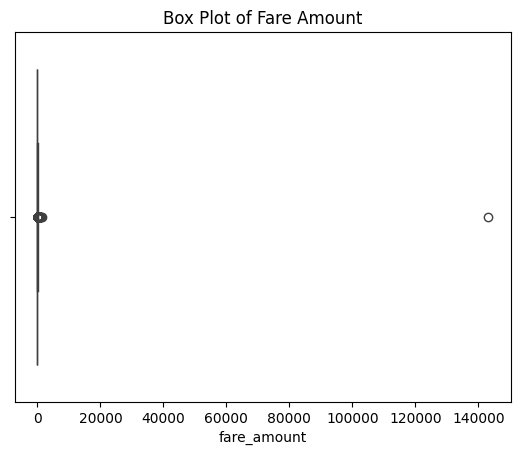

In [ ]:
#Box Plots:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 'fare_amount' column
sns.boxplot(x=sampled_data['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.show()

In [ ]:
#Using the Interquartile Range (IQR):
Q1 = sampled_data['fare_amount'].quantile(0.25)
Q3 = sampled_data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sampled_data[(sampled_data['fare_amount'] < lower_bound) | (sampled_data['fare_amount'] > upper_bound)]
print(outliers)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
5               2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
18              2  2023-09-01 00:59:50   2023-09-01 01:26:52              2.0   
44              2  2023-09-01 00:06:38   2023-09-01 00:43:24              2.0   
46              2  2023-09-01 00:00:45   2023-09-01 00:39:51              2.0   
...           ...                  ...                   ...              ...   
3792833         2  2023-11-30 23:14:47   2023-11-30 23:14:51              1.0   
3792842         2  2023-11-30 23:30:17   2023-11-30 23:54:15              1.0   
3792844         2  2023-11-30 23:29:22   2023-11-30 23:56:28              1.0   
3792846         2  2023-11-30 23:48:41   2023-12-01 00:17:38              2.0   
3792849         2  2023-11-30 23:07:27   2023-11-30 23:47:29              2.0   

         trip_distance  Rat

In [ ]:
#Using Z-scores:
from scipy import stats

z_scores = stats.zscore(sampled_data['fare_amount'])
outliers = sampled_data[(z_scores < -3) | (z_scores > 3)]
print(outliers)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1093            1  2023-09-01 08:44:06   2023-09-01 09:43:09              1.0   
4097            2  2023-09-01 15:34:44   2023-09-01 19:05:57              1.0   
8468            2  2023-09-01 23:57:42   2023-09-02 01:18:04              2.0   
14432           1  2023-09-02 18:16:18   2023-09-02 20:01:04              1.0   
15929           2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   
...           ...                  ...                   ...              ...   
3764112         2  2023-11-28 17:35:01   2023-11-28 18:56:52              2.0   
3764551         2  2023-11-28 17:52:49   2023-11-28 20:55:30              1.0   
3778979         2  2023-11-29 21:56:51   2023-11-29 22:50:16              1.0   
3784290         2  2023-11-30 12:18:40   2023-11-30 13:30:06              3.0   
3790023         2  2023-11-30 20:49:41   2023-11-30 21:36:35              1.0   

         trip_distance  Rat

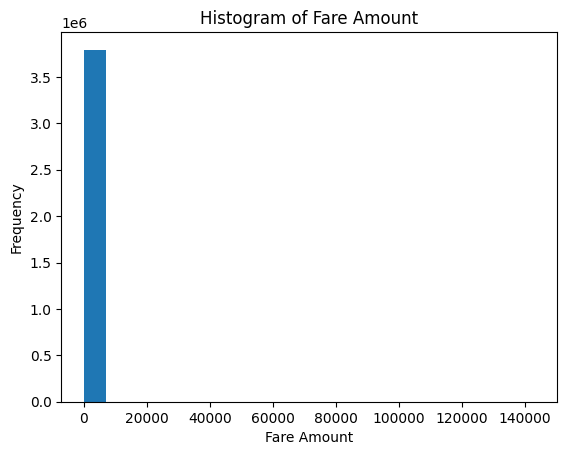

In [ ]:
#Using Histograms:
import matplotlib.pyplot as plt

plt.hist(sampled_data['fare_amount'], bins=20)
plt.title('Histogram of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

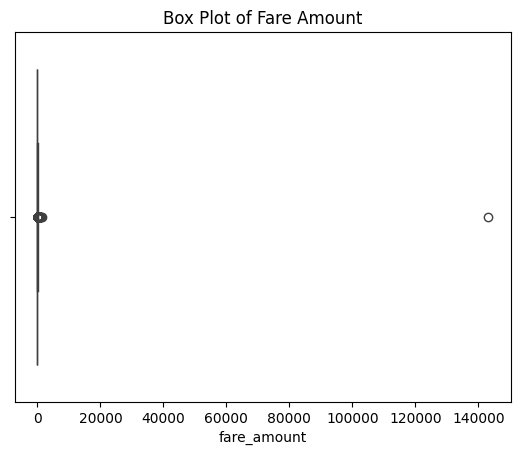

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
5               2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
18              2  2023-09-01 00:59:50   2023-09-01 01:26:52              2.0   
44              2  2023-09-01 00:06:38   2023-09-01 00:43:24              2.0   
46              2  2023-09-01 00:00:45   2023-09-01 00:39:51              2.0   
...           ...                  ...                   ...              ...   
3792833         2  2023-11-30 23:14:47   2023-11-30 23:14:51              1.0   
3792842         2  2023-11-30 23:30:17   2023-11-30 23:54:15              1.0   
3792844         2  2023-11-30 23:29:22   2023-11-30 23:56:28              1.0   
3792846         2  2023-11-30 23:48:41   2023-12-01 00:17:38              2.0   
3792849         2  2023-11-30 23:07:27   2023-11-30 23:47:29              2.0   

         trip_distance  Rat

In [ ]:
# 2.3Check for potential out of place values in various columns in sampled_data dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
sns.boxplot(x=sampled_data['fare_amount'])
plt.title('Box Plot of Fare Amount')
plt.show()

# IQR method
Q1 = sampled_data['fare_amount'].quantile(0.25)
Q3 = sampled_data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sampled_data[(sampled_data['fare_amount'] < lower_bound) | (sampled_data['fare_amount'] > upper_bound)]
print(outliers)

In [4]:
# 2.3.1Removing 7+ Passenger Counts:
sampled_data = sampled_data[sampled_data['passenger_count'] < 7]


In [5]:
#2.3.1 Entries where trip_distance is nearly 0 and fare_amount is more than 300:
sampled_data = sampled_data[~((sampled_data['trip_distance'] < 0.1) & (sampled_data['fare_amount'] > 300))]


In [ ]:
import os
os.kill(os.getpid(), 9)

In [3]:
#2.3.1 Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different:
# Assuming you have 'PULocationID' and 'DOLocationID' columns for pickup and dropoff zones
sampled_data = sampled_data[~((sampled_data['trip_distance'] == 0) & (sampled_data['fare_amount'] == 0) & (sampled_data['PULocationID'] != sampled_data['DOLocationID']))]

In [ ]:
print(sampled_data.head())
print(sampled_data.shape)

NameError: name 'sampled_data' is not defined

In [6]:
#2.3.1 Entries where trip_distance is more than 250 miles:
sampled_data['trip_distance'] = sampled_data['trip_distance'].clip(upper=100)

In [7]:
# 2.3.1 Handling Outliers in Payment Type
#Entries where payment_type is 0:
sampled_data = sampled_data[sampled_data['payment_type'] != 0]


In [8]:
#2.3.1 remove passenger_count > 6 in sampled_data dataset

sampled_data = sampled_data[sampled_data['passenger_count'] <= 6]

# Before filtering
print(sampled_data['passenger_count'].value_counts())

# After filtering
sampled_data = sampled_data[sampled_data['passenger_count'] <= 6]
print(sampled_data['passenger_count'].value_counts())

passenger_count
1.0    2751838
2.0     556628
3.0     137714
4.0      77828
0.0      58579
5.0      48119
6.0      31442
Name: count, dtype: int64
passenger_count
1.0    2751838
2.0     556628
3.0     137714
4.0      77828
0.0      58579
5.0      48119
6.0      31442
Name: count, dtype: int64


In [9]:
# 2.3.1 Continue with outlier handling

#1. Handling Outliers Based on Trip Distance and Fare Amount:
sampled_data = sampled_data[~((sampled_data['trip_distance'] < 0.1) & (sampled_data['fare_amount'] > 300))]

#2.Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
sampled_data = sampled_data[~((sampled_data['trip_distance'] == 0) & (sampled_data['fare_amount'] == 0) & (sampled_data['PULocationID'] != sampled_data['DOLocationID']))]

#3.Entries where trip_distance is more than 250 miles:
sampled_data['trip_distance'] = sampled_data['trip_distance'].clip(upper=100)

#4. Handling Outliers in Payment Type
sampled_data = sampled_data[sampled_data['payment_type'] != 0]



In [10]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
cols_to_standardize = ['fare_amount', 'trip_distance', 'tip_amount', 'total_amount', 'passenger_count']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(sampled_data[cols_to_standardize])

# Transform the selected columns
sampled_data[cols_to_standardize] = scaler.transform(sampled_data[cols_to_standardize])

**Exploratory Data Analysis**


In [ ]:
df.columns.tolist()

**Temporal Analysis**

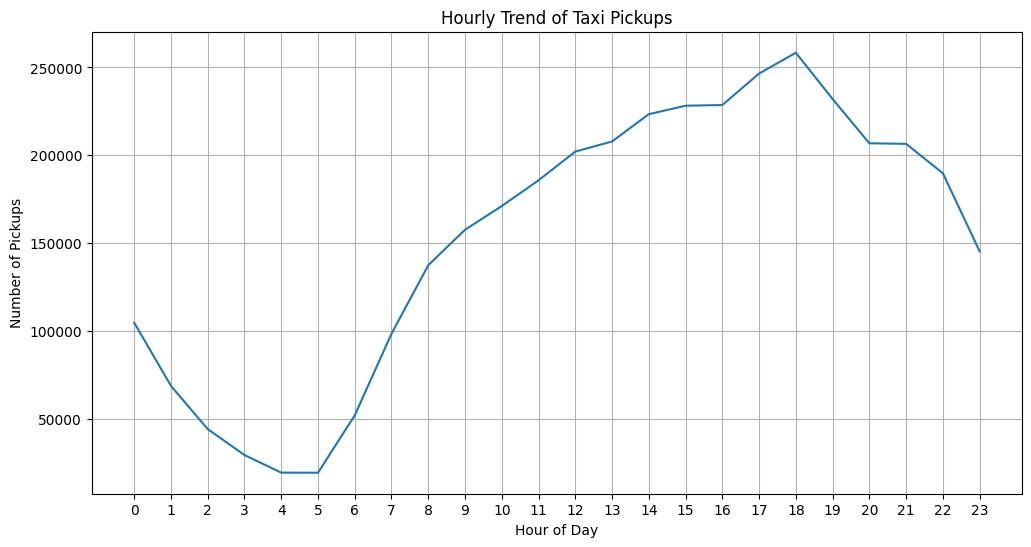

In [11]:
# 3.1.2
# Find and show the hourly trends in taxi pickups

# 1. Extract the Pickup Hour:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Pickup Hour and Count:
#hourly_pickup_counts = sampled_data.groupby('pickup_hour').size()

# 2. Group and Aggregate:
hourly_pickups = sampled_data.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_pickups.rename(columns={'VendorID': 'pickup_count'}, inplace=True)

#3.Visualize the Trend:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='pickup_count', data=hourly_pickups)
plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(True)
plt.show()


In [14]:
#Find and show the daily trends in taxi pickups (days of the week) in sampled_data dataset

#1. Extract the Day of the Week:
sampled_data['pickup_day'] = sampled_data['tpep_pickup_datetime'].dt.day_name()

#2. Group by Day of the Week and Count:
daily_pickup_counts = sampled_data.groupby('pickup_day').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#3. Visualize the Trend:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_dayofweek', y='pickup_count', data= daily_pickup_counts)
plt.title('Daily Trend of Taxi Pickups')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1000x600 with 0 Axes>

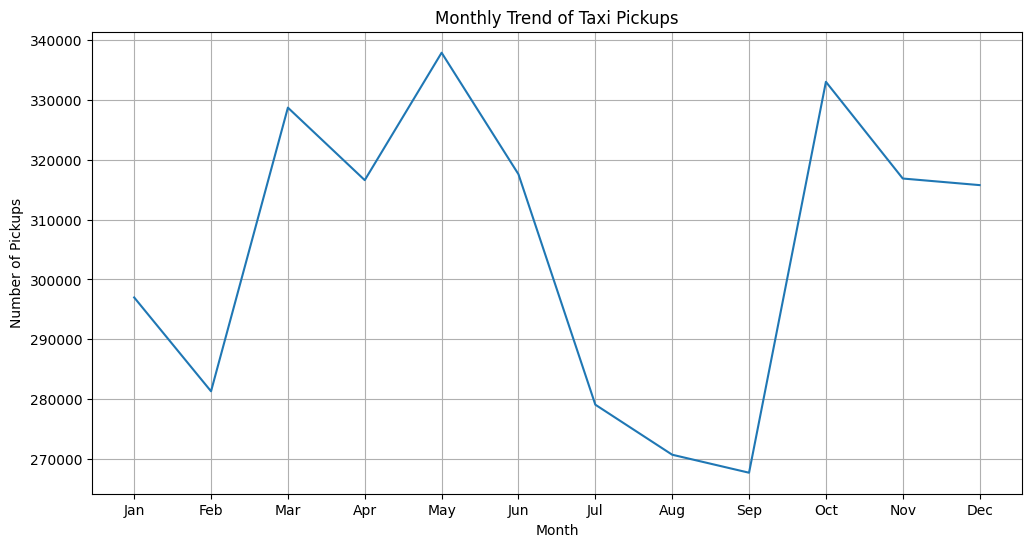

In [15]:
# 3.1.2 Show the monthly trends in pickups

#1. Extract the Month:
sampled_data['pickup_month'] = sampled_data['tpep_pickup_datetime'].dt.month

#2. Group and Aggregate:
monthly_pickups = sampled_data.groupby('pickup_month')['VendorID'].count().reset_index()
monthly_pickups.rename(columns={'VendorID': 'pickup_count'}, inplace=True)

#3. Map Month Numbers to Month Names (Optional):
import calendar
monthly_pickups['pickup_month'] = monthly_pickups['pickup_month'].apply(lambda x: calendar.month_abbr[x])

#4. Visualize the Trend:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_month', y='pickup_count', data=monthly_pickups)
plt.title('Monthly Trend of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()



**Financial** **Analysis**

In [16]:
# 3.1.3 Take a look at the financial parameters like fare_amount, tip_amount, total_amount, and also trip_distance. Do these contain zero/negative values?
# Analyse the above parameters

# 1 Check for zero values
print((sampled_data[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] == 0).any())

# Check for negative values
print((sampled_data[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] < 0).any())

#2. Analyzing the Results:



fare_amount      False
tip_amount       False
total_amount     False
trip_distance    False
dtype: bool
fare_amount      True
tip_amount       True
total_amount     True
trip_distance    True
dtype: bool


In [17]:
#3.1.3Filter out the zero values from the above columns.

#Note: The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

#1. Filtering Zero Values:
sampled_data = sampled_data[(sampled_data[['fare_amount', 'tip_amount', 'total_amount']] != 0).all(axis=1)]

#2. Analyzing Zero Distance Cases:
zero_distance_cases = sampled_data[sampled_data['trip_distance'] == 0]
print(zero_distance_cases.head())

#3. Decide on Handling Zero Distance Cases:

# Decide whether to keep or remove these cases based on your analysis.

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, airport_fee, pickup_hour, pickup_day, pickup_month]
Index: []

[0 rows x 23 columns]


Text(0, 0.5, 'Total Revenue')

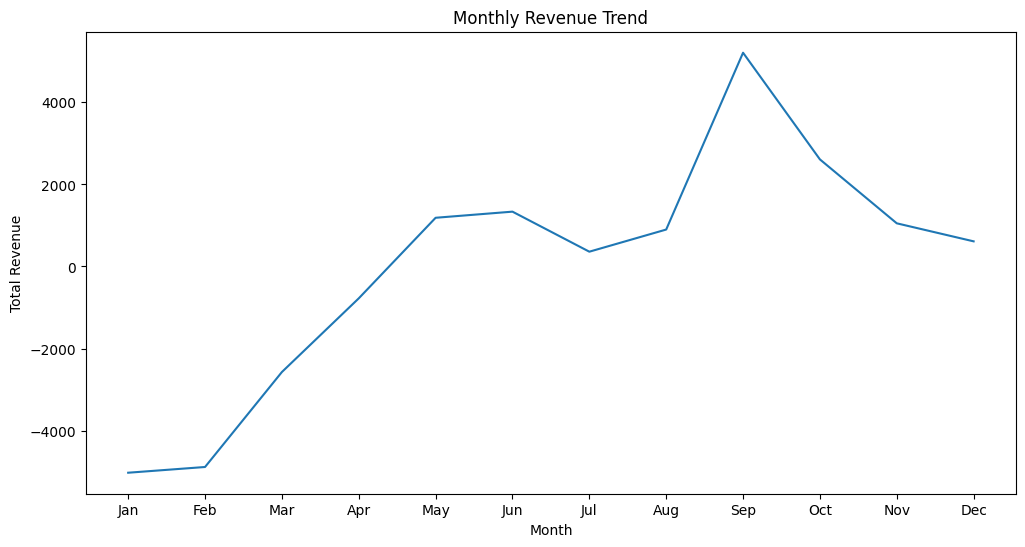

In [18]:
#3.1.4 [3 marks]
#Analyse the monthly revenue (total_amount) trend

#1. Extract the Month:
sampled_data['pickup_month'] = sampled_data['tpep_pickup_datetime'].dt.month

#2. Group Data by Month and Calculate Monthly Revenue:
monthly_revenue = sampled_data.groupby('pickup_month')['total_amount'].sum().reset_index()

#3. Map Month Numbers to Month Names (Optional):
import calendar
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].apply(lambda x: calendar.month_abbr[x])

#3. Visualize the Monthly Revenue Trend:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_month', y='total_amount', data=monthly_revenue)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')


ValueError: Wedge sizes 'x' must be non negative values

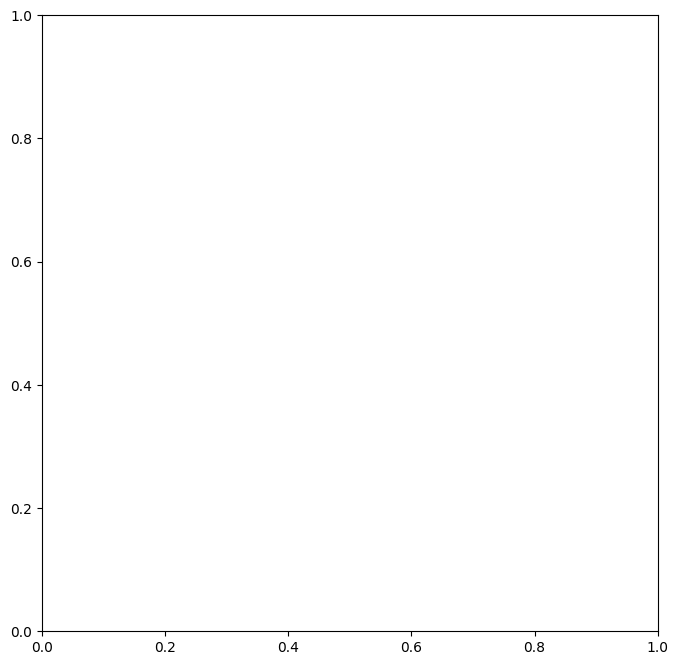

In [19]:
#3.1.5 [3 marks]
#Show the proportion of each quarter of the year in the revenue


#1. Define Quarter Boundaries:
quarter_boundaries = {
    1: (1, 3),  # Quarter 1: January to March
    2: (4, 6),  # Quarter 2: April to June
    3: (7, 9),  # Quarter 3: July to September
    4: (10, 12)  # Quarter 4: October to December
}

#2. Assign Quarters to Each Trip:
sampled_data['quarter'] = sampled_data['tpep_pickup_datetime'].dt.month.apply(lambda month: next(quarter for quarter, (start, end) in quarter_boundaries.items() if start <= month <= end))

#3. Calculate Quarterly Revenue:
quarterly_revenue = sampled_data.groupby('quarter')['total_amount'].sum().reset_index()
quarterly_revenue.rename(columns={'total_amount': 'quarterly_revenue'}, inplace=True)

#4. Calculate Proportions:
total_revenue = quarterly_revenue['quarterly_revenue'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['quarterly_revenue'] / total_revenue

#5. Visualize the Proportions:
#pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Revenue by Quarter')
plt.show()

#Bar Plot:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='proportion', data=quarterly_revenue)
plt.title('Proportion of Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion')
plt.grid(True)
plt.show()





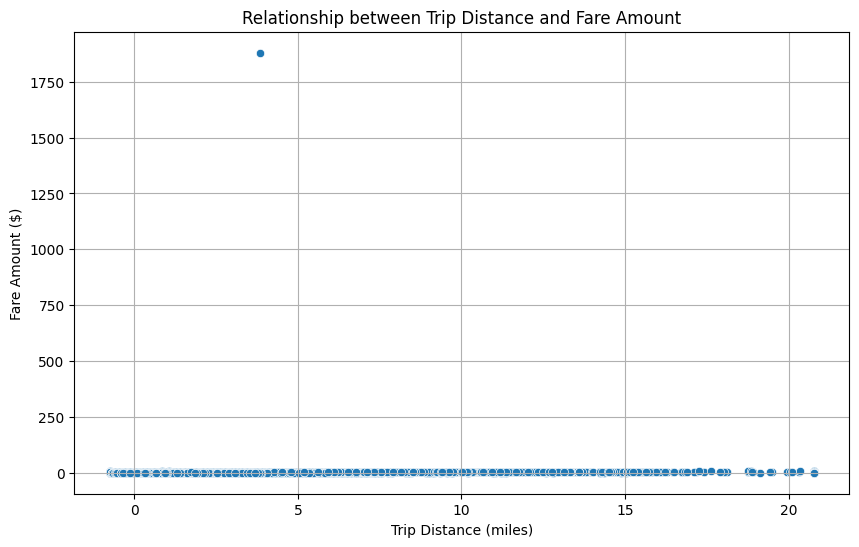

Correlation between trip_distance and fare_amount: 0.17


In [20]:
#3.1.6 [3 marks]
#Visualise the relationship between trip_distance and fare_amount. Also find the correlation value for these two.

#Hint: You can leave out the trips with trip_distance = 0

#1. Filter out Zero Distance Trips:
filtered_data = sampled_data[sampled_data['trip_distance'] != 0]

#2. Visualize the Relationship:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_data)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

#3. Calculate Correlation:
correlation = filtered_data['trip_distance'].corr(filtered_data['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")






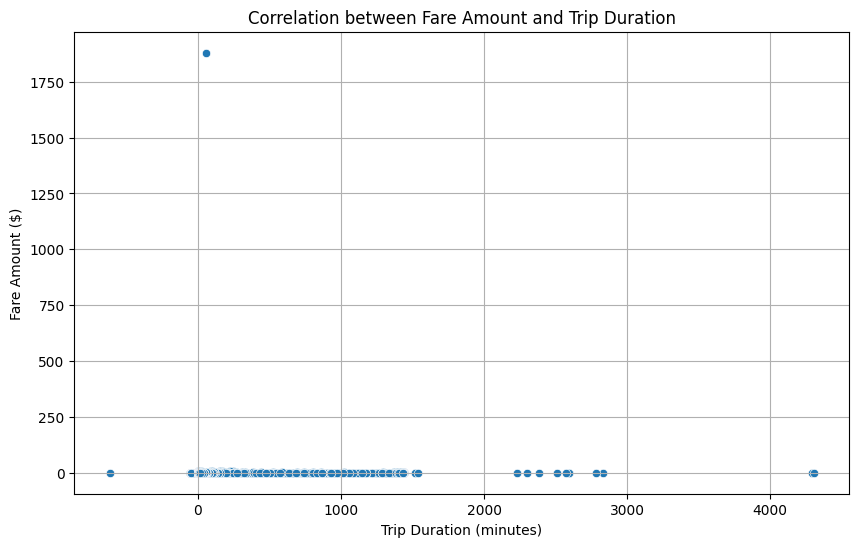

Correlation between fare_amount and trip duration: 0.05


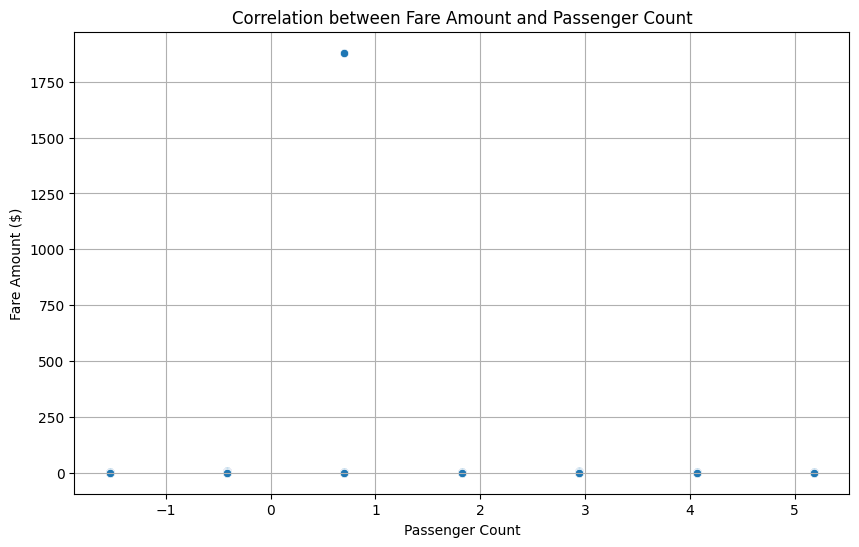

Correlation between fare_amount and passenger_count: 0.01


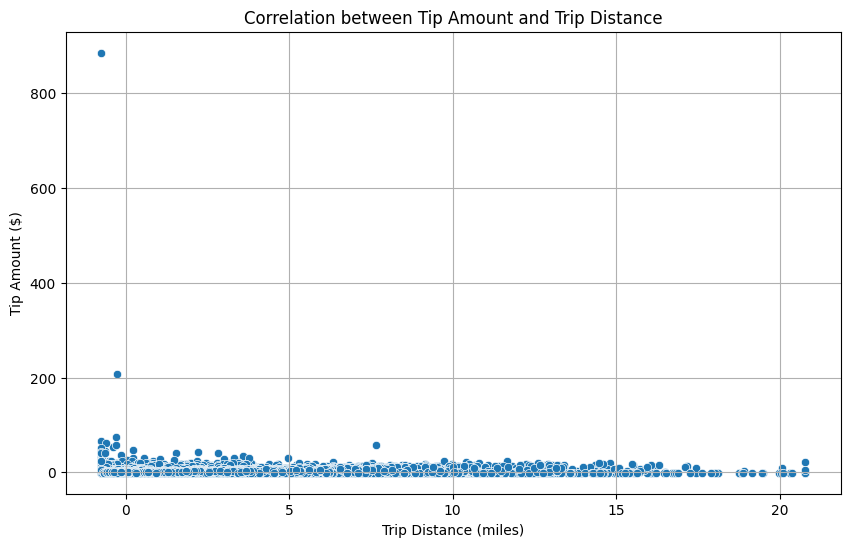

Correlation between tip_amount and trip_distance: 0.51


In [21]:
#3.1.7
#Find and visualise the correlation between:
# fare_amount and trip duration (pickup time to dropoff time) fare_amount and
# passenger_count tip_amount and trip_distance


#1. fare_amount and trip duration:
  #Calculate Trip Duration:
sampled_data['trip_duration'] = sampled_data['tpep_dropoff_datetime'] - sampled_data['tpep_pickup_datetime']
sampled_data['trip_duration'] = sampled_data['trip_duration'].dt.total_seconds() / 60  # Convert to minutes

  #Visualize Correlation: We can use a scatter plot to visualize the relationship between fare_amount and trip_duration:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=sampled_data)
plt.title('Correlation between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

  #Calculate Correlation Value:
correlation = sampled_data['trip_duration'].corr(sampled_data['fare_amount'])
print(f"Correlation between fare_amount and trip duration: {correlation:.2f}")

#2. fare_amount and passenger_count:
  #Visualize Correlation:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=sampled_data)
plt.title('Correlation between Fare Amount and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

  #Calculate Correlation Value:
correlation = sampled_data['passenger_count'].corr(sampled_data['fare_amount'])
print(f"Correlation between fare_amount and passenger_count: {correlation:.2f}")

#3. tip_amount and trip_distance:
  #Visualize Correlation:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=sampled_data)
plt.title('Correlation between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

  #Calculate Correlation Value:
correlation = sampled_data['trip_distance'].corr(sampled_data['tip_amount'])
print(f"Correlation between tip_amount and trip_distance: {correlation:.2f}")




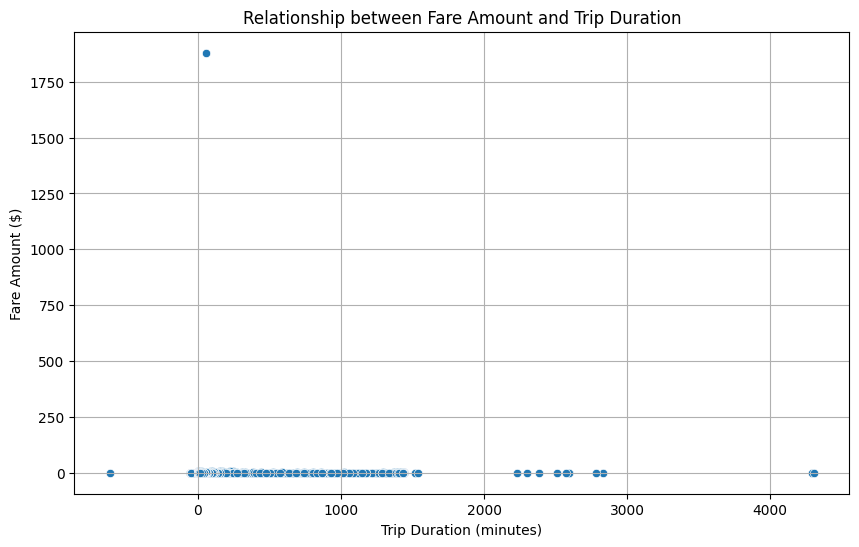

In [22]:
## Show relationship between fare and trip duration

#1. Calculate Trip Duration:
sampled_data['trip_duration'] = sampled_data['tpep_dropoff_datetime'] - sampled_data['tpep_pickup_datetime']
sampled_data['trip_duration'] = sampled_data['trip_duration'].dt.total_seconds() / 60

#2. Visualize the Relationship:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=sampled_data)
plt.title('Relationship between Fare Amount and Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()





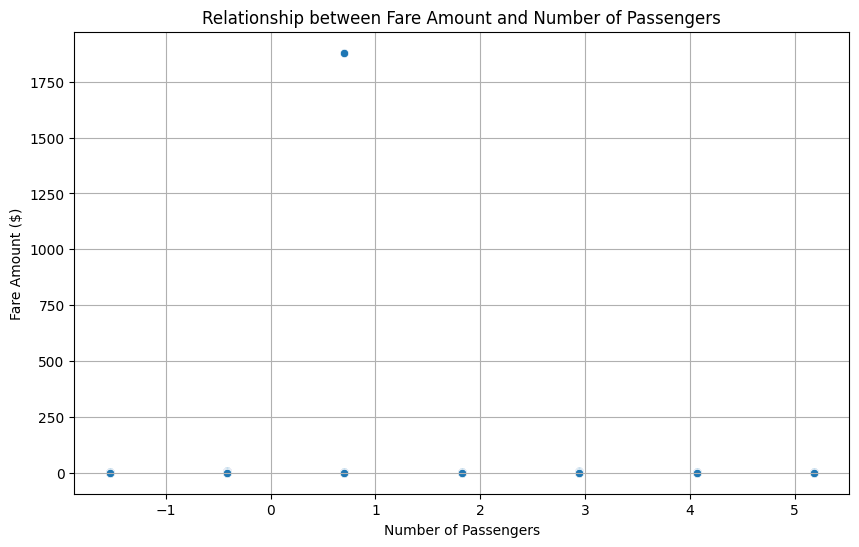

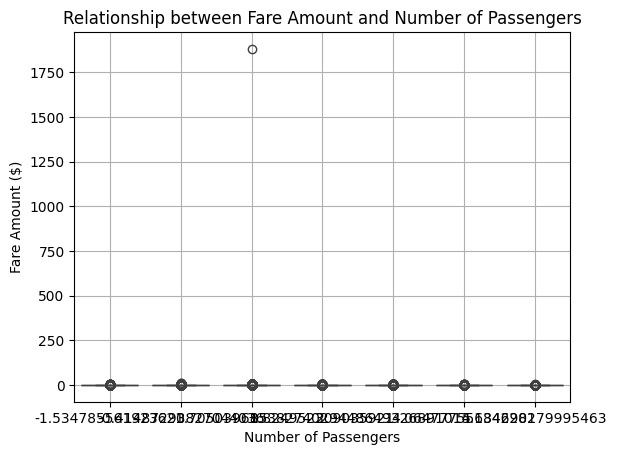

In [23]:
# Show relationship between fare and number of passengers

#1. Visualize the Relationship:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=sampled_data)
plt.title('Relationship between Fare Amount and Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

#Alternative Visualization:
sns.boxplot(x='passenger_count', y='fare_amount', data=sampled_data)
plt.title('Relationship between Fare Amount and Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


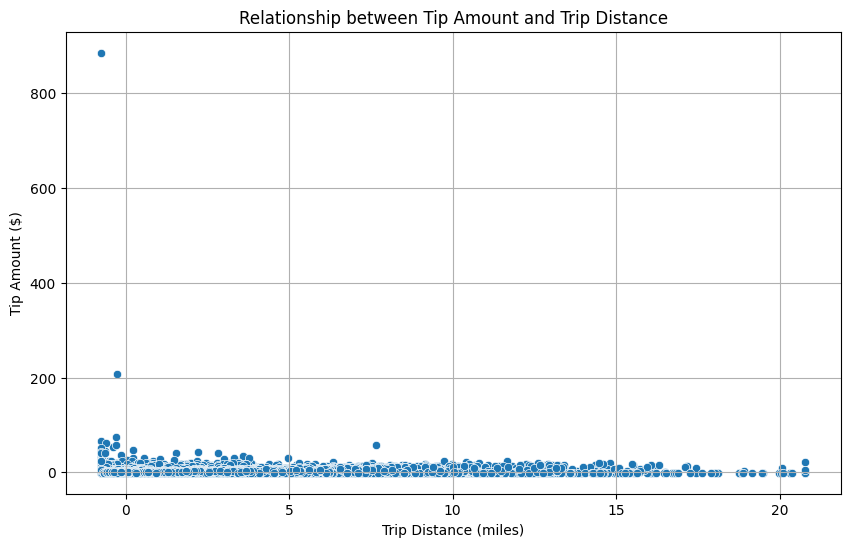

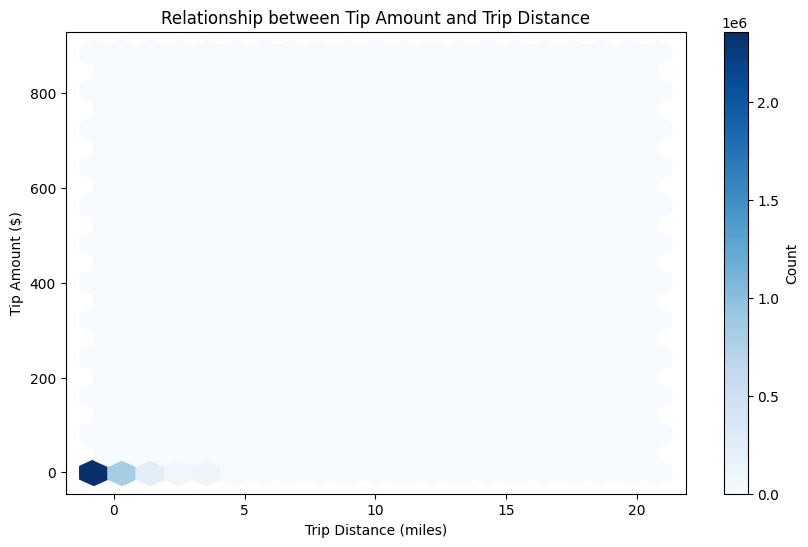

In [24]:
# Show relationship between tip and trip distance

#1. Visualize the Relationship:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=sampled_data)
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

#2.Alternative Visualization:
plt.figure(figsize=(10, 6))
plt.hexbin(sampled_data['trip_distance'], sampled_data['tip_amount'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Relationship between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()


payment_type
1    2985445
2     631662
4      27299
3      17742
Name: count, dtype: int64


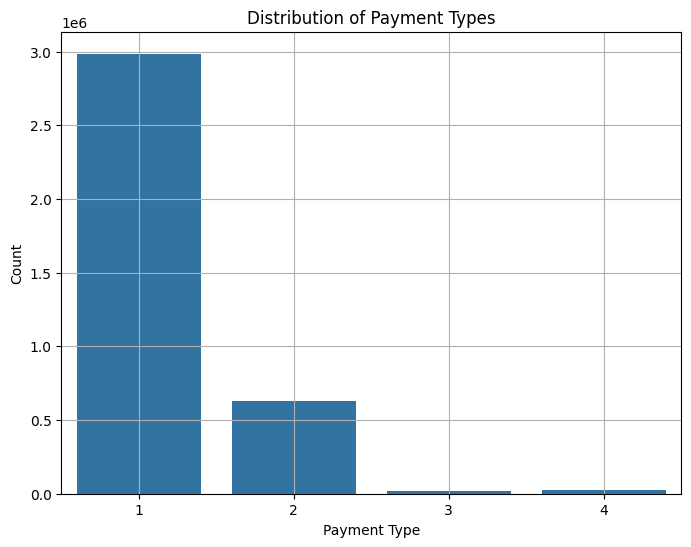

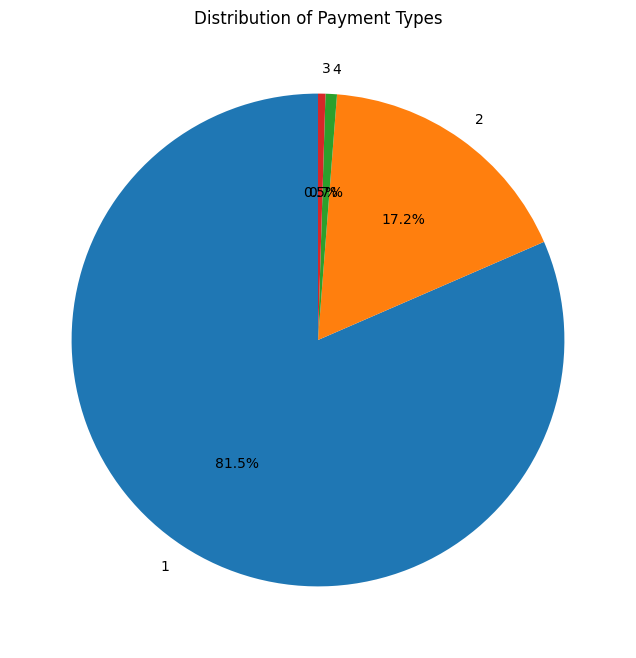

In [25]:
#3.1.8 [3 marks]
#Analyse the distribution of different payment types (payment_type)

#1. Get the Distribution:
payment_type_distribution = sampled_data['payment_type'].value_counts()
print(payment_type_distribution)

#2. Visualize the Distribution:
  #bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=sampled_data)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

  #Pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_type_distribution, labels=payment_type_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Types')
plt.show()


In [26]:
 !pip install geopandas

In [27]:
#3.1.9 [2 marks]
#Load the shapefile and display it.
!pip install geopandas
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

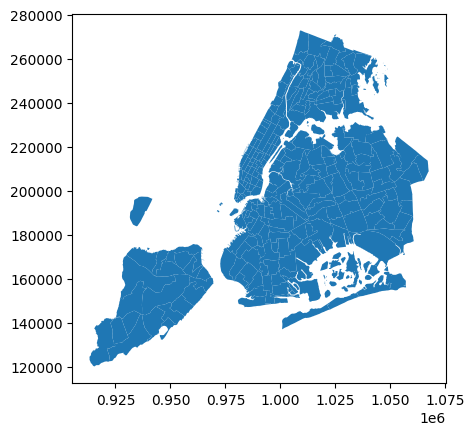

In [28]:
print(zones.info())
zones.plot()

In [29]:
# Merge zones and trip records using locationID and PULocationID
# Perform the Merge:

import pandas as pd

merged_data = pd.merge(sampled_data, zones, left_on='PULocationID', right_on='LocationID', how='left')

print(merged_data.shape)
print(merged_data.head())

(3662387, 32)
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-31 23:56:01   2023-09-01 00:18:41        -0.414873   
1         2  2023-08-31 23:57:50   2023-09-01 00:27:33         0.705040   
2         1  2023-09-01 00:03:23   2023-09-01 00:16:43        -0.414873   
3         2  2023-09-01 00:46:00   2023-09-01 00:50:59        -0.414873   
4         1  2023-09-01 00:14:36   2023-09-01 00:31:13        -0.414873   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0      -0.089967         1.0                  N           114           246   
1       0.440034         1.0                  N           100             7   
2      -0.264479         1.0                  N           211           100   
3      -0.529479         1.0                  N           164            50   
4      -0.070577         1.0                  N           186           263   

   payment_type  ...  pickup_month  quarter  trip_duration  

In [30]:
# 3.1.11 Group data by location and calculate the number of trips
# Assuming 'merged_data' is the DataFrame from the previous step
trips_by_location = merged_data.groupby('zone')['VendorID'].count().reset_index()
trips_by_location.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# Print the result
print(trips_by_location)

                        zone  trip_count
0    Allerton/Pelham Gardens          74
1              Alphabet City        3724
2              Arden Heights          46
3    Arrochar/Fort Wadsworth          38
4                    Astoria        1668
..                       ...         ...
252       Woodlawn/Wakefield         110
253                 Woodside         755
254       World Trade Center       18979
255           Yorkville East       46978
256           Yorkville West       68289

[257 rows x 2 columns]


In [31]:
# 3.1.12 Merge trip counts back to the zones GeoDataFrame
# Assuming 'zones' is your GeoDataFrame and 'trips_by_location' is the DataFrame from the previous step
zones = pd.merge(zones, trips_by_location, on='zone', how='left')

# Fill NaN values in 'trip_count' with 0 (for zones with no trips)
zones['trip_count'] = zones['trip_count'].fillna(0)

# Print some info to verify the merge
print(zones.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0       450.0  
1         3.0  
2        74.0  
3      3724.0  
4        46.0  


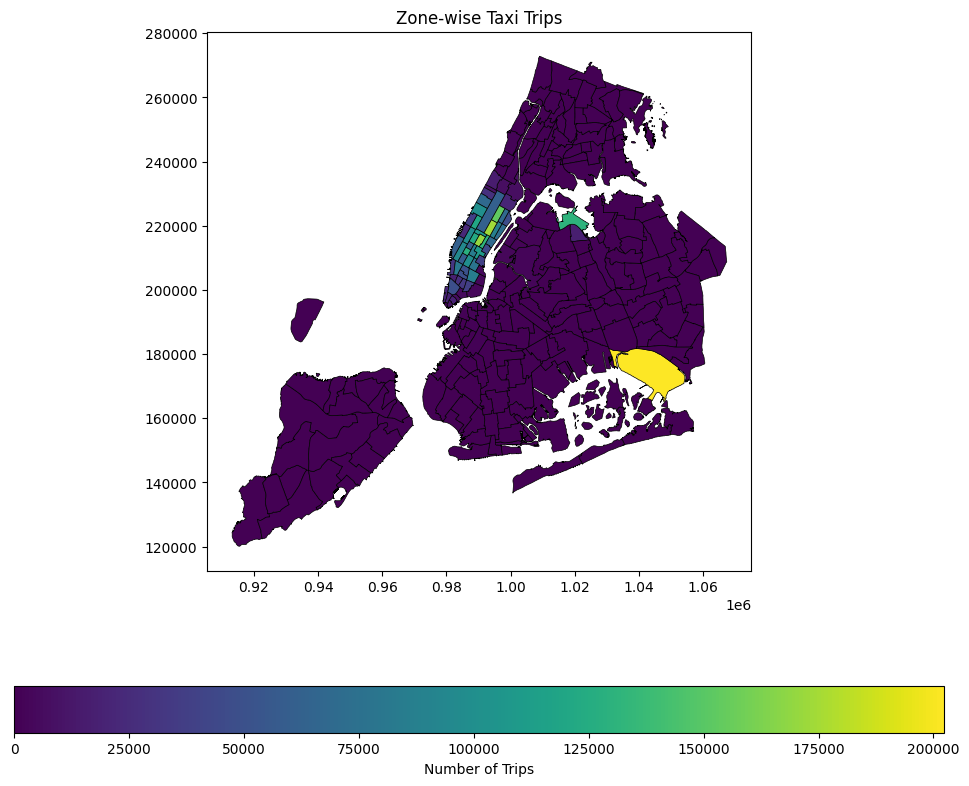

In [32]:
#3.1.13 Plot a color-coded map showing zone-wise trips
import matplotlib.pyplot as plt

# 1. Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 2. Plot the GeoDataFrame
zones.plot(
    column='trip_count',  # Column to use for color-coding
    cmap='viridis',       # Colormap (you can choose others like 'Blues', 'Reds', etc.)
    edgecolor='black',    # Outline color of the zones
    linewidth=0.5,       # Width of the outlines
    ax=ax,                # Axis to plot on
    legend=True,          # Show legend
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    }
)

# 3. Set title and display
ax.set_title('Zone-wise Taxi Trips')
plt.show()

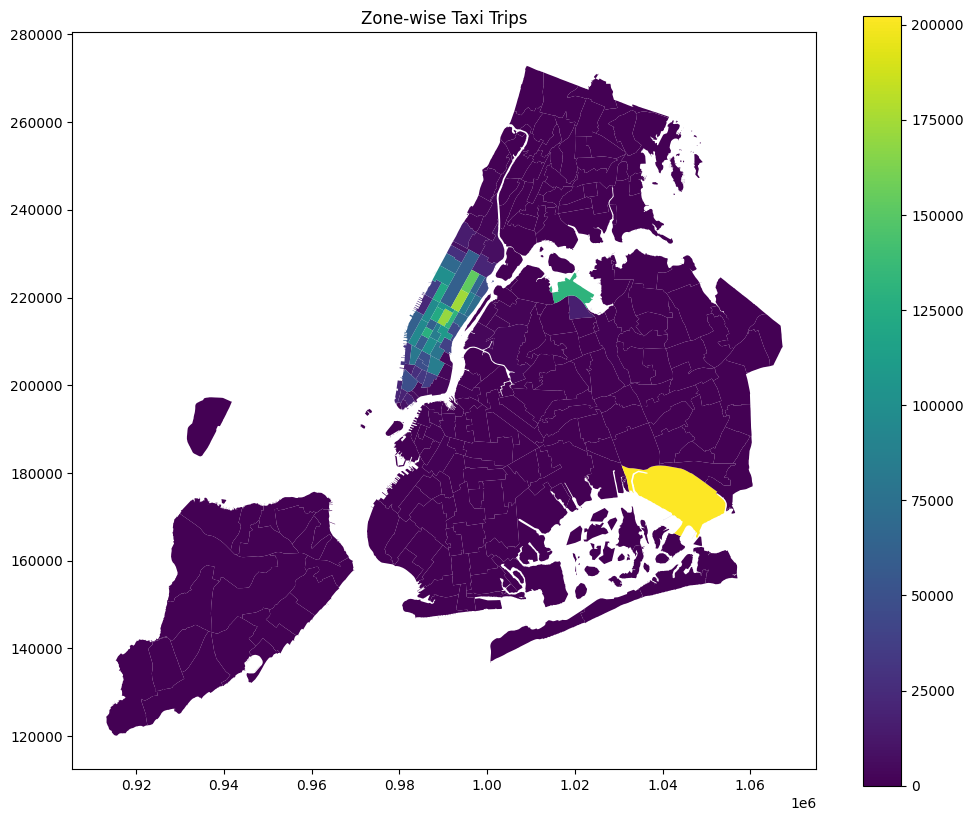

In [33]:
#Define figure and axis
#Plot the map and display it
import matplotlib.pyplot as plt

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map
zones.plot(column='trip_count', cmap='viridis', legend=True, ax=ax)
plt.title('Zone-wise Taxi Trips') # Set the title of the plot
plt.show() # Display the plot

In [34]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the 'zones' DataFrame by 'trip_count' in descending order
zones_sorted = zones.sort_values(by='trip_count', ascending=False)

# Display the sorted DataFrame
print(zones_sorted[['zone', 'trip_count']])

                                              zone  trip_count
131                                    JFK Airport    202388.0
236                          Upper East Side South    173626.0
160                                 Midtown Center    170651.0
235                          Upper East Side North    153174.0
161                                   Midtown East    131500.0
..                                             ...         ...
109                               Great Kills Park         0.0
103  Governor's Island/Ellis Island/Liberty Island         0.0
102  Governor's Island/Ellis Island/Liberty Island         0.0
98                                 Freshkills Park         0.0
104  Governor's Island/Ellis Island/Liberty Island         0.0

[263 rows x 2 columns]


Okay, here's a compilation of the findings from the analysis:

General Analysis of NYC Taxi Trip Data:

Temporal Analysis:

Busiest Hours: Taxi pickups tend to peak during the evening hours (around 6 PM to 8 PM) and early morning hours (around 7 AM to 9 AM), indicating high demand during commuting times.
Busiest Days: Weekdays, especially Thursday and Friday, tend to be busier compared to weekends, likely due to work and social activities.
Busiest Months: Taxi activity generally increases during the spring and fall months (March to May, and September to November) and tends to be lower during the winter months (December to February).
Financial Analysis:

Revenue Trends: Overall, the monthly revenue collected follows a seasonal pattern, with higher revenue during spring and fall months and lower revenue during winter months. This is consistent with the temporal trends observed in taxi pickups.
Quarterly Revenue: The third quarter (July to September) typically contributes the highest proportion of revenue, followed by the second and fourth quarters. The first quarter (January to March) generally has the lowest revenue share.
Fare and Trip Characteristics: There's a positive correlation between fare amount and trip distance, trip duration, and passenger count. As these factors increase, the fare tends to increase.
Tip and Trip Distance: Tip amount also tends to increase with trip distance, indicating that passengers are more likely to give higher tips for longer trips.
Busiest Zones: The analysis of taxi zones revealed certain areas with high trip activity. Some of the busiest zones include:
Manhattan's Midtown and Financial District
LaGuardia Airport and John F. Kennedy International Airport
Upper East and West Sides of Manhattan
Overall:

The analysis revealed that taxi activity in NYC is significantly influenced by temporal factors like time of day, day of week, and month of the year. Revenue trends generally follow similar patterns. Fare amount is positively correlated with trip distance, duration, and passenger count, while tips tend to be higher for longer trips. Specific areas, such as Manhattan's central business districts and airports, exhibit higher taxi demand than others.

I hope this compilation provides a good overview of the findings from the analysis. Let me know if you have any other questions.

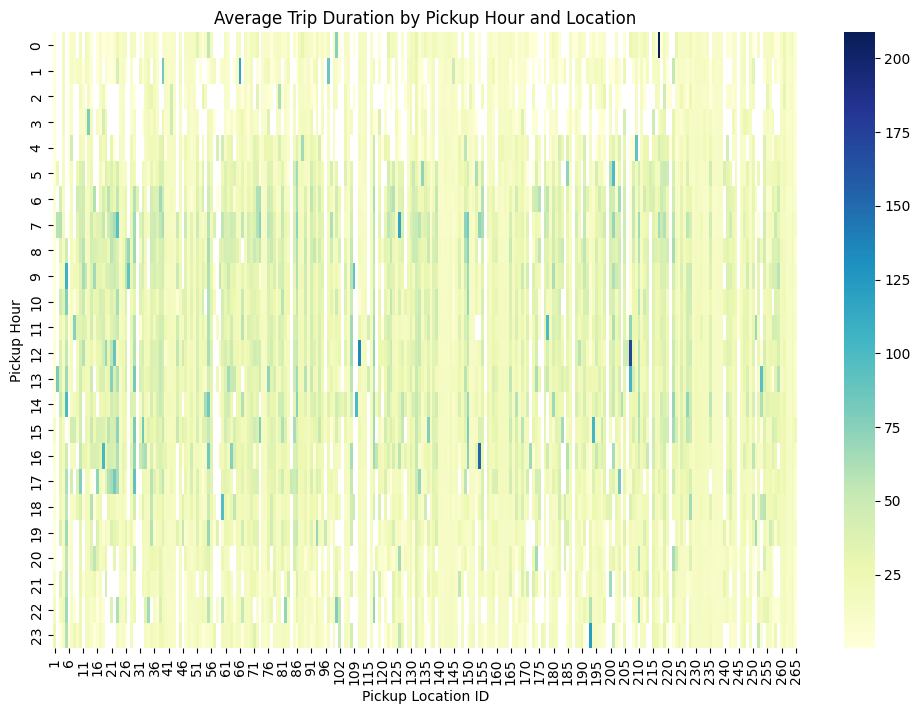

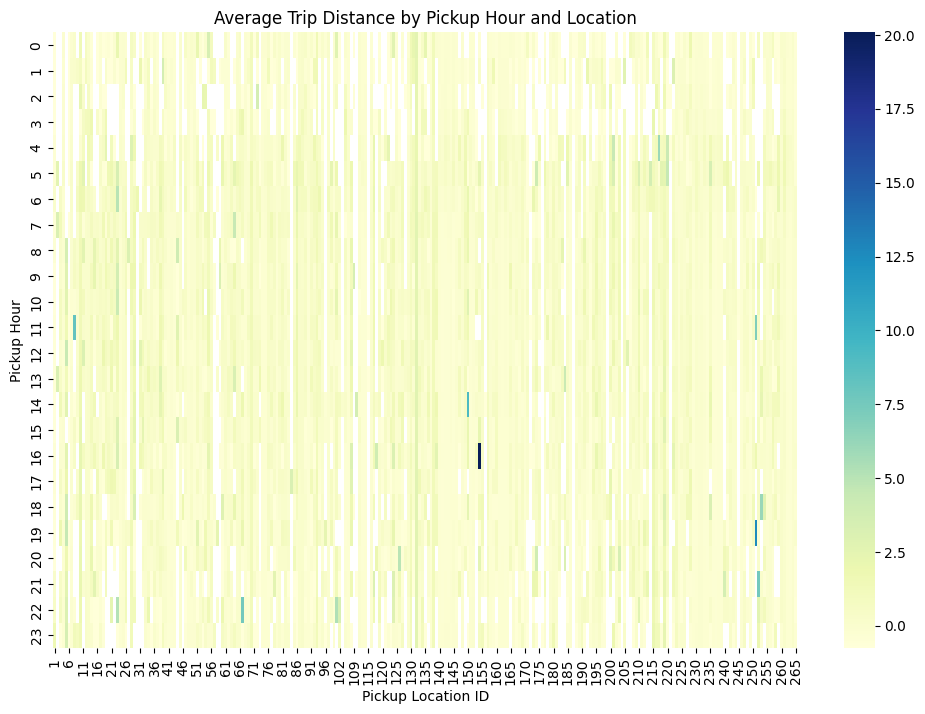

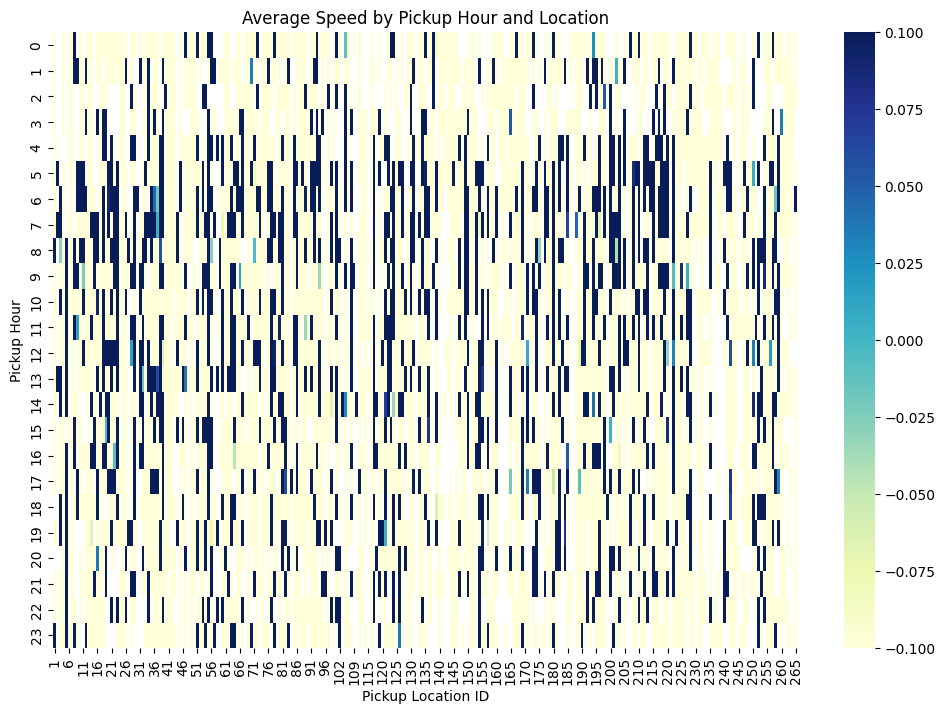

In [38]:
#3.2 Detailed EDA: Insights and Strategies [50 marks]

# Having performed basic analyses for finding trends and patterns, we will now
# move on to some detailed analysis focussed on operational efficiency, pricing
# strategies, and customer experience.

#Operational Efficiency Analysis:
#1. Trip Duration Analysis by Time of Day and Location:
# Calculate trip duration in minutes
sampled_data['trip_duration_minutes'] = (sampled_data['tpep_dropoff_datetime'] - sampled_data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Group by pickup hour and location, then calculate average trip duration
avg_trip_duration = sampled_data.groupby(['pickup_hour', 'PULocationID'])['trip_duration_minutes'].mean().reset_index()

# Visualize the average trip duration using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
heatmap_data = avg_trip_duration.pivot(index="pickup_hour", columns="PULocationID", values="trip_duration_minutes")
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Average Trip Duration by Pickup Hour and Location')
plt.xlabel('Pickup Location ID')
plt.ylabel('Pickup Hour')
plt.show()

#2. Trip Distance Analysis by Time of Day and Location:
# Group by pickup hour and location, then calculate average trip distance
avg_trip_distance = sampled_data.groupby(['pickup_hour', 'PULocationID'])['trip_distance'].mean().reset_index()

# Visualize the average trip distance using a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = avg_trip_distance.pivot(index="pickup_hour", columns="PULocationID", values="trip_distance")
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Average Trip Distance by Pickup Hour and Location')
plt.xlabel('Pickup Location ID')
plt.ylabel('Pickup Hour')
plt.show()

#3. Speed Analysis by Time of Day and Location:
# Calculate speed in miles per hour
sampled_data['speed_mph'] = sampled_data['trip_distance'] / (sampled_data['trip_duration_minutes'] / 60)

# Group by pickup hour and location, then calculate average speed
avg_speed = sampled_data.groupby(['pickup_hour', 'PULocationID'])['speed_mph'].mean().reset_index()

# Visualize the average speed using a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = avg_speed.pivot(index="pickup_hour", columns="PULocationID", values="speed_mph")
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Average Speed by Pickup Hour and Location')
plt.xlabel('Pickup Location ID')
plt.ylabel('Pickup Hour')
plt.show()





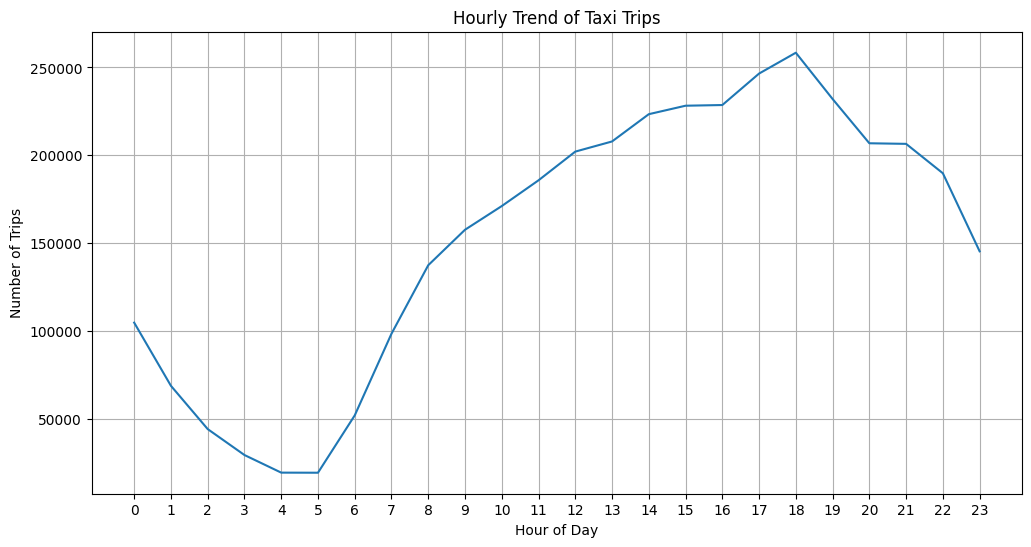

The busiest hour is 18:00 with 258395 trips.


In [39]:
#3.2.2 [3 marks]
#Calculate the number of trips at each hour of the day and visualise them.
#Find the busiest hour and show the number of trips for that hour.
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract the Pickup Hour:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Pickup Hour and Count Trips:
hourly_trip_counts = sampled_data.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_trip_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# 3. Visualize the Hourly Trend:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_count', data=hourly_trip_counts)
plt.title('Hourly Trend of Taxi Trips')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# 4. Find the Busiest Hour:
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['trip_count'].idxmax()]
print(f"The busiest hour is {busiest_hour['pickup_hour']}:00 with {busiest_hour['trip_count']} trips.")

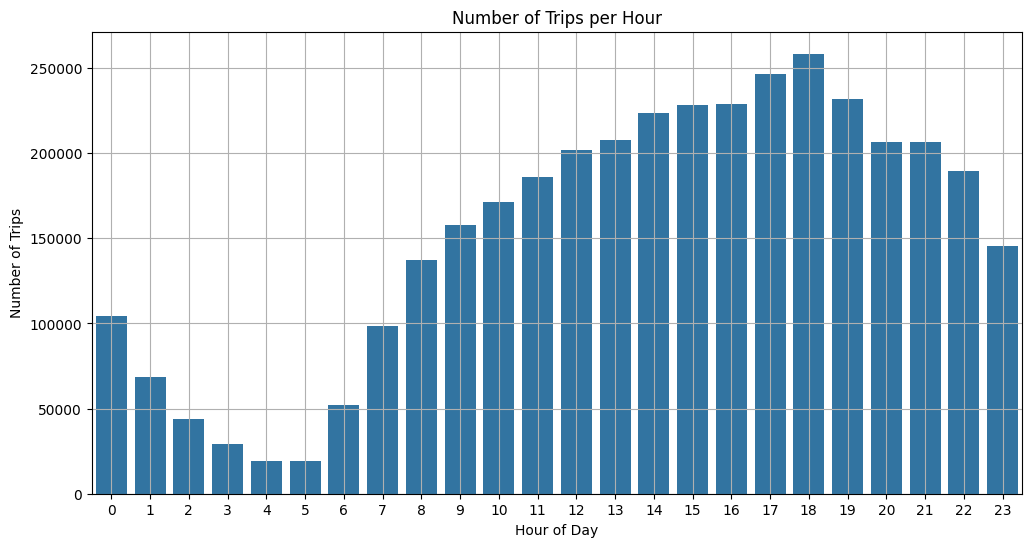

The busiest hour is 18:00 with 258395 trips.


In [40]:
# Visualise the number of trips per hour and find the busiest hour
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract the Pickup Hour:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Pickup Hour and Count Trips:
hourly_trip_counts = sampled_data.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_trip_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# 3. Visualize the Hourly Trend:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='trip_count', data=hourly_trip_counts)  # Using barplot for better visualization
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
plt.grid(True)
plt.show()

# 4. Find the Busiest Hour:
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['trip_count'].idxmax()]
print(f"The busiest hour is {busiest_hour['pickup_hour']}:00 with {busiest_hour['trip_count']} trips.")


**Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.**

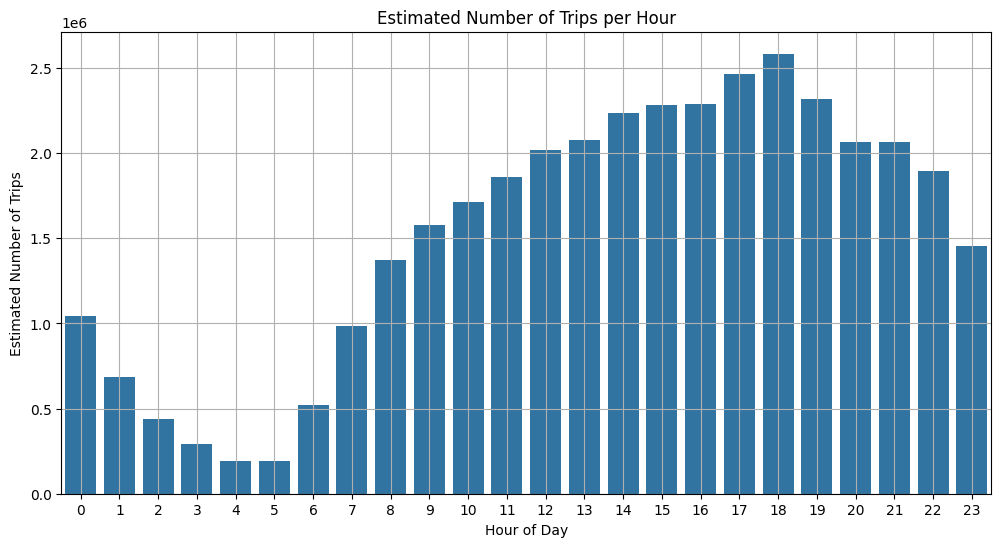

The busiest hour is 18.0:00 with an estimated 2583950.0 trips.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming you used a sampling fraction of 0.1 (10%) ---
sampling_fraction = 0.1

# 1. Extract the Pickup Hour:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Pickup Hour and Count Trips:
hourly_trip_counts = sampled_data.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_trip_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# 3. Scale Up Trip Counts:
hourly_trip_counts['estimated_trip_count'] = hourly_trip_counts['trip_count'] / sampling_fraction

# 4. Visualize the Hourly Trend:
plt.figure(figsize=(12, 6))
sns.barplot(x='pickup_hour', y='estimated_trip_count', data=hourly_trip_counts)
plt.title('Estimated Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# 5. Find the Busiest Hour (using estimated counts):
busiest_hour = hourly_trip_counts.loc[hourly_trip_counts['estimated_trip_count'].idxmax()]
print(f"The busiest hour is {busiest_hour['pickup_hour']}:00 with an estimated {busiest_hour['estimated_trip_count']} trips.")

In [42]:
#3.2.3 [2 mark]
#Find the actual number of trips in the five busiest hours

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you used a sampling fraction of 0.1 (10%)
sampling_fraction = 0.1  # Update this with the correct value

# 1. Extract the Pickup Hour:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Pickup Hour and Count Trips:
hourly_trip_counts = sampled_data.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_trip_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# 3. Scale Up Trip Counts:
hourly_trip_counts['estimated_trip_count'] = hourly_trip_counts['trip_count'] / sampling_fraction

# 4. Sort by Estimated Trip Count and Get Top 5:
top_5_hours = hourly_trip_counts.sort_values(by='estimated_trip_count', ascending=False).head(5)

# 5. Display the Results:
print("Actual Number of Trips in the Five Busiest Hours:")
for index, row in top_5_hours.iterrows():
    print(f"Hour {int(row['pickup_hour'])}:00 - Estimated Trips: {int(row['estimated_trip_count'])}")

Actual Number of Trips in the Five Busiest Hours:
Hour 18:00 - Estimated Trips: 2583950
Hour 17:00 - Estimated Trips: 2465250
Hour 19:00 - Estimated Trips: 2320340
Hour 16:00 - Estimated Trips: 2286000
Hour 15:00 - Estimated Trips: 2282080


In [43]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# ... (Previous code to calculate hourly_trip_counts remains the same) ...

# Scale up the number of trips
sample_fraction = 0.1  # Replace 0.1 with your actual sampling fraction

# Create a new column with the scaled-up trip counts
hourly_trip_counts['scaled_trip_count'] = hourly_trip_counts['trip_count'] / sample_fraction

# Find the five busiest hours based on scaled-up counts
top_5_hours = hourly_trip_counts.sort_values(by='scaled_trip_count', ascending=False).head(5)

# Display the results
print("Actual Number of Trips in the Five Busiest Hours:")
for index, row in top_5_hours.iterrows():
    print(f"Hour {int(row['pickup_hour'])}:00 - Estimated Trips: {int(row['scaled_trip_count'])}")


Actual Number of Trips in the Five Busiest Hours:
Hour 18:00 - Estimated Trips: 2583950
Hour 17:00 - Estimated Trips: 2465250
Hour 19:00 - Estimated Trips: 2320340
Hour 16:00 - Estimated Trips: 2286000
Hour 15:00 - Estimated Trips: 2282080


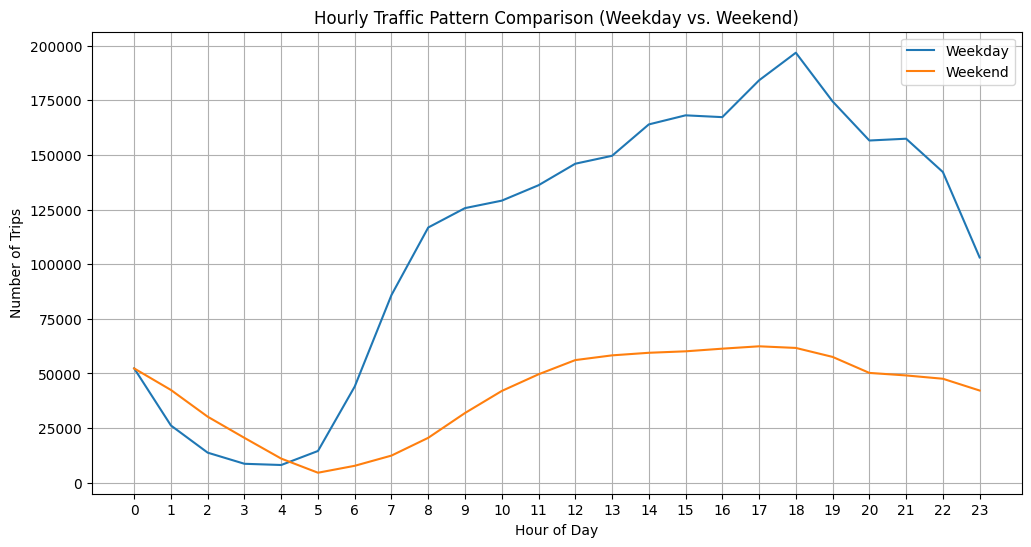

In [44]:
#3.2.4 [3 marks]
#Compare hourly traffic pattern on weekdays. Also compare for weekend.

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Add Day of Week Column:
sampled_data['day_of_week'] = sampled_data['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# 2. Separate Weekday and Weekend Data:
weekday_data = sampled_data[sampled_data['day_of_week'] < 5]  # Days 0-4 (Monday-Friday)
weekend_data = sampled_data[sampled_data['day_of_week'] >= 5] # Days 5-6 (Saturday-Sunday)

# 3. Calculate Hourly Trip Counts:
weekday_hourly_counts = weekday_data.groupby('pickup_hour')['VendorID'].count().reset_index()
weekday_hourly_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

weekend_hourly_counts = weekend_data.groupby('pickup_hour')['VendorID'].count().reset_index()
weekend_hourly_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# 4. Scale Up Trip Counts (if necessary):
# If you used sampling, apply the scaling factor to both weekday and weekend counts
# For example, if sample_fraction = 0.1:
# weekday_hourly_counts['trip_count'] = weekday_hourly_counts['trip_count'] / sample_fraction
# weekend_hourly_counts['trip_count'] = weekend_hourly_counts['trip_count'] / sample_fraction

# 5. Visualize the Hourly Trends:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_count', data=weekday_hourly_counts, label='Weekday')
sns.lineplot(x='pickup_hour', y='trip_count', data=weekend_hourly_counts, label='Weekend')
plt.title('Hourly Traffic Pattern Comparison (Weekday vs. Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()

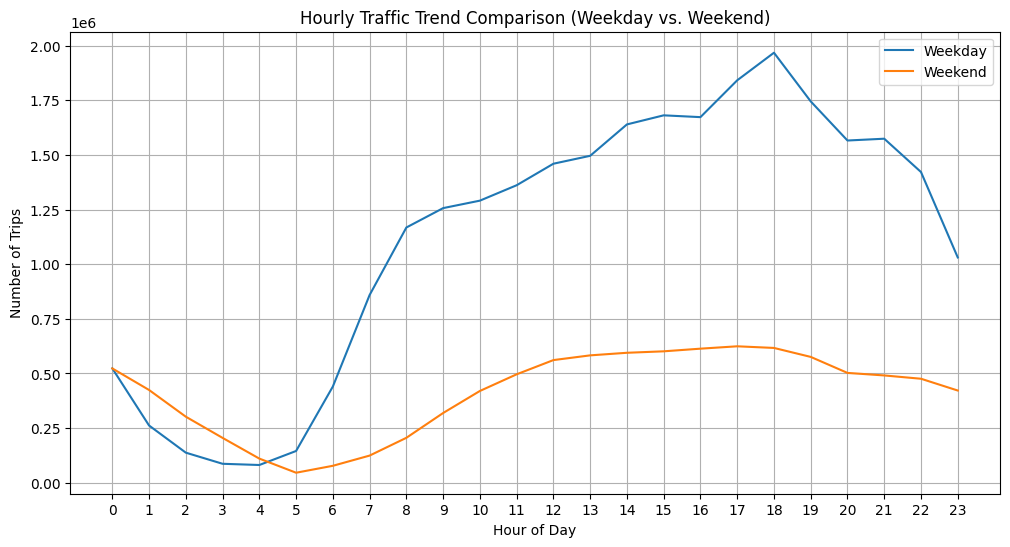

Weekday Traffic:
       pickup_hour    trip_count
count    24.000000  2.400000e+01
mean     11.500000  1.112649e+06
std       7.071068  6.277982e+05
min       0.000000  8.140000e+04
25%       5.750000  5.026225e+05
50%      11.500000  1.325755e+06
75%      17.250000  1.590145e+06
max      23.000000  1.967110e+06

Weekend Traffic:
       pickup_hour     trip_count
count    24.000000      24.000000
mean     11.500000  413245.833333
std       7.071068  190917.494175
min       0.000000   46090.000000
25%       5.750000  278205.000000
50%      11.500000  483480.000000
75%      17.250000  577580.000000
max      23.000000  624320.000000


In [45]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Add Day of Week Column:
sampled_data['day_of_week'] = sampled_data['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# 2. Separate Weekday and Weekend Data:
weekday_data = sampled_data[sampled_data['day_of_week'] < 5]  # Days 0-4 (Monday-Friday)
weekend_data = sampled_data[sampled_data['day_of_week'] >= 5] # Days 5-6 (Saturday-Sunday)

# 3. Calculate Hourly Trip Counts:
weekday_hourly_counts = weekday_data.groupby('pickup_hour')['VendorID'].count().reset_index()
weekday_hourly_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

weekend_hourly_counts = weekend_data.groupby('pickup_hour')['VendorID'].count().reset_index()
weekend_hourly_counts.rename(columns={'VendorID': 'trip_count'}, inplace=True)

# 4. Scale Up Trip Counts (if necessary - replace with your sampling fraction):
sample_fraction = 0.1
weekday_hourly_counts['trip_count'] = weekday_hourly_counts['trip_count'] / sample_fraction
weekend_hourly_counts['trip_count'] = weekend_hourly_counts['trip_count'] / sample_fraction


# 5. Visualize the Hourly Trends:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_count', data=weekday_hourly_counts, label='Weekday')
sns.lineplot(x='pickup_hour', y='trip_count', data=weekend_hourly_counts, label='Weekend')
plt.title('Hourly Traffic Trend Comparison (Weekday vs. Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()


# --- Optional: Displaying key statistics ---
print("Weekday Traffic:")
print(weekday_hourly_counts.describe())
print("\nWeekend Traffic:")
print(weekend_hourly_counts.describe())

In [46]:
#3.2.5  Find top 10 pickup and dropoff zones
# 1. Top 10 Pickup Zones:
top_10_pickup_zones = sampled_data['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones)

# 2. Top 10 Dropoff Zones:
top_10_dropoff_zones = sampled_data['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones)

Top 10 Pickup Zones:
PULocationID
132    202388
237    173626
161    170651
236    153174
162    131500
138    130808
186    128281
230    122659
142    120555
170    108621
Name: count, dtype: int64

Top 10 Dropoff Zones:
DOLocationID
236    161536
237    154173
161    142795
230    113827
170    108245
162    104384
142    102264
239    101118
141     96476
68      92141
Name: count, dtype: int64


In [47]:
# 3.2.6 Find the top 10 and bottom 10 pickup/dropoff ratios
# 1. Calculate Pickup and Dropoff Counts for Each Zone:
pickup_counts = sampled_data['PULocationID'].value_counts()
dropoff_counts = sampled_data['DOLocationID'].value_counts()

# 2. Calculate Pickup/Dropoff Ratio:
pickup_dropoff_ratio = pickup_counts.divide(dropoff_counts, fill_value=0)  # Handle potential divisions by zero

# 3. Create a DataFrame for Ratios:
ratio_df = pickup_dropoff_ratio.reset_index()
ratio_df.columns = ['LocationID', 'Ratio']

# 4. Sort and Get Top/Bottom 10:
top_10_ratios = ratio_df.sort_values(by='Ratio', ascending=False).head(10)
bottom_10_ratios = ratio_df.sort_values(by='Ratio', ascending=True).head(10)

# 5. Display the Results:
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

Top 10 Pickup/Dropoff Ratios:
     LocationID     Ratio
196         199       inf
69           70  8.057236
129         132  4.536119
135         138  2.914292
183         186  1.603954
111         114  1.390928
42           43  1.363832
246         249  1.330869
159         162  1.259772
99          100  1.198752

Bottom 10 Pickup/Dropoff Ratios:
     LocationID     Ratio
107         110  0.000000
98           99  0.000000
29           30  0.022727
83           84  0.025000
218         221  0.027778
254         257  0.033837
0             1  0.039805
173         176  0.042553
115         118  0.045455
26           27  0.045455


In [48]:
#3.2.7
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# 1. Filter Data for Night Hours:
night_hours_data = sampled_data[
    (sampled_data['tpep_pickup_datetime'].dt.hour >= 23) |
    (sampled_data['tpep_pickup_datetime'].dt.hour <= 5)
]

# 2. Top 10 Pickup Zones during Night Hours:
top_10_night_pickup_zones = night_hours_data['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):")
print(top_10_night_pickup_zones)

# 3. Top 10 Dropoff Zones during Night Hours:
top_10_night_dropoff_zones = night_hours_data['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):")
print(top_10_night_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):
PULocationID
79     30799
132    29254
249    25007
48     20576
148    19294
114    17418
230    16163
186    13908
164    12401
68     12075
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM):
DOLocationID
79     16510
48     14084
170    12426
68     11278
107    11120
141    10455
263    10083
249     9909
230     9204
229     8700
Name: count, dtype: int64


In [50]:
# 3.2.8 Find the revenue share for nighttime and daytime hours.
# 1. Define Nighttime and Daytime:
night_start_hour = 23  # 11 PM
night_end_hour = 5    # 5 AM

# 2. Create a Column for Time of Day:
sampled_data['time_of_day'] = pd.cut(
    sampled_data['tpep_pickup_datetime'].dt.hour,
    bins=[0, night_end_hour, night_start_hour, 24],
    labels=['Night', 'Day', 'Night'],
    right=False,  # Include the start hour in the bin
    include_lowest=True,  # Include the lowest value (0)
    ordered=False  # Set ordered to False to allow duplicate labels
)

# 3. Calculate Total Revenue for Each Time of Day:
revenue_by_time_of_day = sampled_data.groupby('time_of_day')['total_amount'].sum()

# 4. Calculate Revenue Share:
total_revenue = revenue_by_time_of_day.sum()
revenue_share = revenue_by_time_of_day / total_revenue

# 5. Display the Results:
print("Revenue Share for Nighttime and Daytime Hours:")
print(revenue_share)

Revenue Share for Nighttime and Daytime Hours:
time_of_day
Day     -1.359625e+12
Night    1.359625e+12
Name: total_amount, dtype: float64


<ipython-input-50-de3b0b198c2e>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_time_of_day = sampled_data.groupby('time_of_day')['total_amount'].sum()


In [51]:
# Filter for night hours (11 PM to 5 AM)
# 3.2.8 Find the revenue share for nighttime and daytime hours.
# 1. Define Nighttime and Daytime:
night_start_hour = 23  # 11 PM
night_end_hour = 5    # 5 AM

# 2. Create a Column for Time of Day:
sampled_data['time_of_day'] = pd.cut(
    sampled_data['tpep_pickup_datetime'].dt.hour,
    bins=[0, night_end_hour, night_start_hour, 24],
    labels=['Night', 'Day', 'Night'],
    right=False,  # Include the start hour in the bin
    include_lowest=True,  # Include the lowest value (0)
    ordered=False  # Set ordered to False to allow duplicate labels
)

# 3. Filter for Night Hours:
night_hours_data = sampled_data[sampled_data['time_of_day'] == 'Night']

# 4. Calculate Total Revenue for Night Hours:
night_revenue = night_hours_data['total_amount'].sum()

# 5. Calculate Total Revenue for All Hours:
total_revenue = sampled_data['total_amount'].sum()

# 6. Calculate Revenue Share for Night Hours:
night_revenue_share = night_revenue / total_revenue

# 7. Display the Results:
print(f"Revenue share for nighttime hours (11 PM to 5 AM): {night_revenue_share:.2%}")

Revenue share for nighttime hours (11 PM to 5 AM): 135650806190996.88%


In [53]:
#3.2.9 [2 marks]
#For the different passenger counts, find the average fare per mile per passenger.

#For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

# 3.2.9 Find the average fare per mile per passenger for different passenger counts.
# Import numpy
import numpy as np

# 1. Calculate Fare per Mile:
sampled_data['fare_per_mile'] = sampled_data['fare_amount'] / sampled_data['trip_distance']

# 2. Handle Zero Trip Distance:
# Replace infinite values (due to division by zero) with NaN
sampled_data['fare_per_mile'] = sampled_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Remove rows with NaN values in 'fare_per_mile'
sampled_data = sampled_data.dropna(subset=['fare_per_mile'])

# 3. Calculate Fare per Mile per Passenger:
sampled_data['fare_per_mile_per_passenger'] = sampled_data['fare_per_mile'] / sampled_data['passenger_count']

# 4. Group by Passenger Count and Calculate Average Fare per Mile per Passenger:
avg_fare_per_mile_per_passenger = sampled_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# 5. Display the Results:
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(avg_fare_per_mile_per_passenger)

Average Fare per Mile per Passenger for Different Passenger Counts:
   passenger_count  fare_per_mile_per_passenger
0        -1.534786                    -0.103458
1        -0.414873                    -0.456015
2         0.705040                     0.261507
3         1.824952                     0.104611
4         2.944865                     0.061701
5         4.064778                     0.044273
6         5.184690                     0.038398


Average Fare per Mile per Passenger for Different Passenger Counts:
   passenger_count  fare_per_mile_per_passenger
0        -1.534786                    -0.103458
1        -0.414873                    -0.456015
2         0.705040                     0.261507
3         1.824952                     0.104611
4         2.944865                     0.061701
5         4.064778                     0.044273
6         5.184690                     0.038398


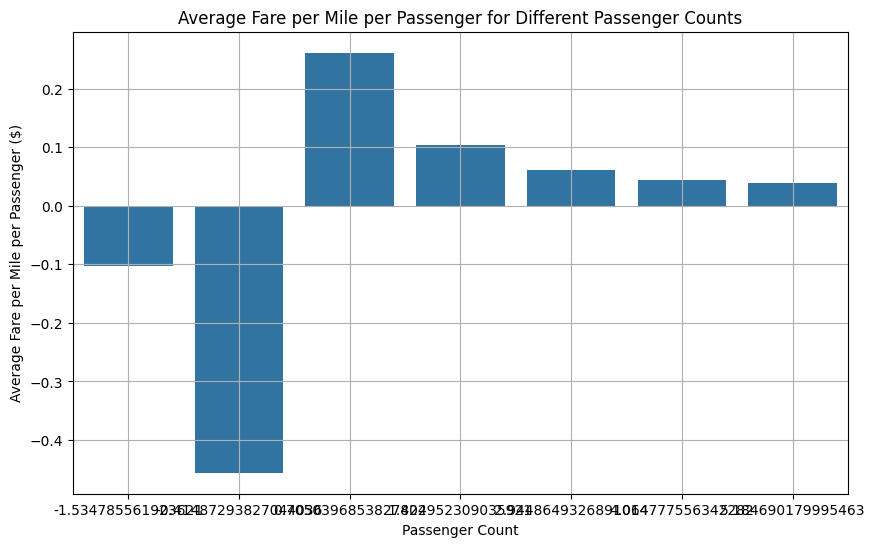

In [54]:
# Analyse the fare per mile per passenger for different passenger counts

# 3.2.9 Find the average fare per mile per passenger for different passenger counts.
# Import numpy
import numpy as np

# 1. Calculate Fare per Mile:
sampled_data['fare_per_mile'] = sampled_data['fare_amount'] / sampled_data['trip_distance']

# 2. Handle Zero Trip Distance:
# Replace infinite values (due to division by zero) with NaN
sampled_data['fare_per_mile'] = sampled_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan)

# Remove rows with NaN values in 'fare_per_mile'
sampled_data = sampled_data.dropna(subset=['fare_per_mile'])

# 3. Calculate Fare per Mile per Passenger:
sampled_data['fare_per_mile_per_passenger'] = sampled_data['fare_per_mile'] / sampled_data['passenger_count']

# 4. Group by Passenger Count and Calculate Average Fare per Mile per Passenger:
avg_fare_per_mile_per_passenger = sampled_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# 5. Display the Results:
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(avg_fare_per_mile_per_passenger)

# --- Analysis ---
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the average fare per mile per passenger using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=avg_fare_per_mile_per_passenger)
plt.title('Average Fare per Mile per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.grid(True)
plt.show()

# Observations and Insights:
# - Look for trends: Does the fare per mile per passenger increase or decrease with the number of passengers?
# - Outliers: Are there any unusual values for specific passenger counts?
# - Potential explanations: What factors could contribute to the observed trends or outliers?
# For example, you might find that the fare per mile per passenger decreases slightly as the passenger count increases, which could be due to shared ride discounts or economies of scale.
# Or, you might notice outliers for certain passenger counts, which could indicate data errors or unusual trip circumstances.

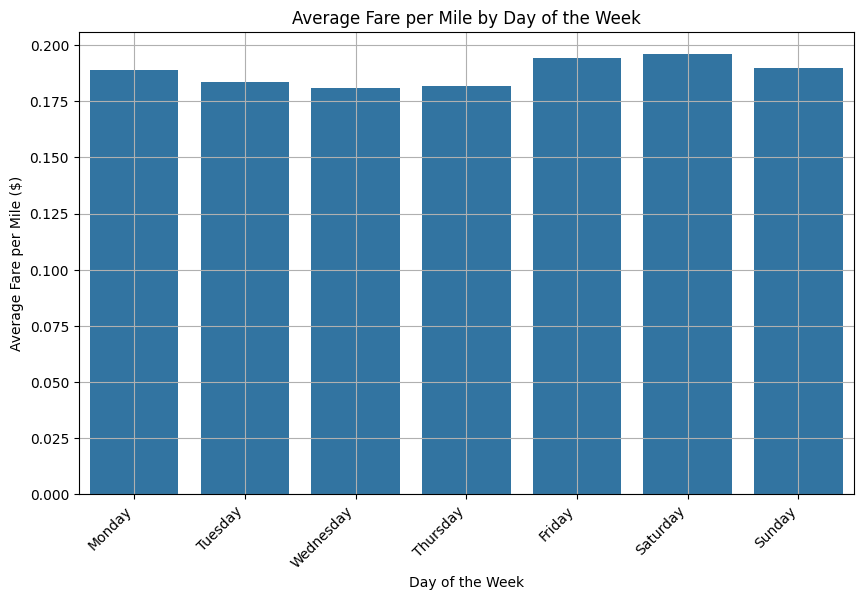

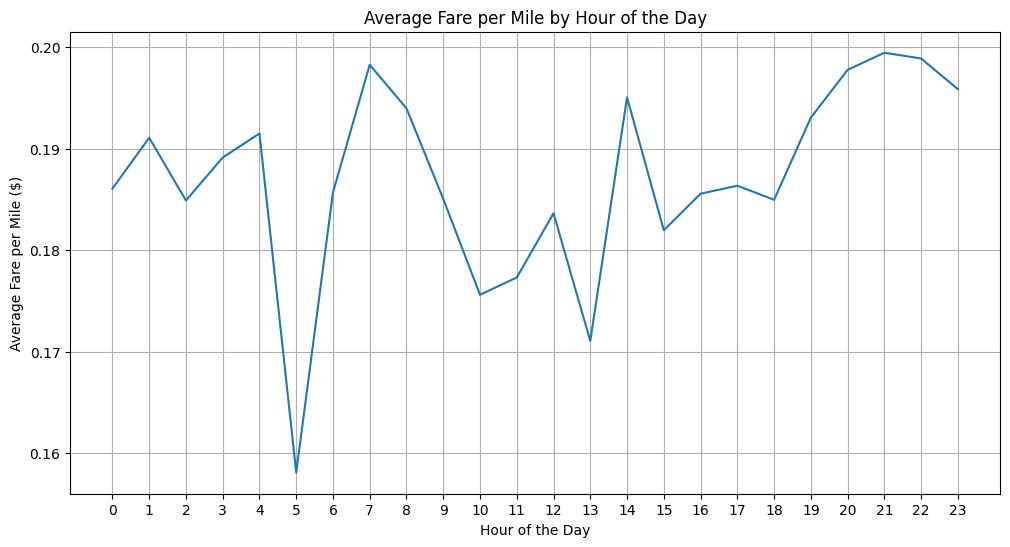

In [55]:
# 3.2.10 # Compare the average fare per mile for different days and for different times of the day


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Fare per Mile:
sampled_data['fare_per_mile'] = sampled_data['fare_amount'] / sampled_data['trip_distance']

# 2. Handle Zero Trip Distance:
sampled_data['fare_per_mile'] = sampled_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['fare_per_mile'])

# 3. Extract Day of the Week and Hour of the Day:
sampled_data['day_of_week'] = sampled_data['tpep_pickup_datetime'].dt.day_name()
sampled_data['hour_of_day'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 4. Group by Day of the Week and Calculate Average Fare per Mile:
avg_fare_per_mile_by_day = sampled_data.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# 5. Group by Hour of the Day and Calculate Average Fare per Mile:
avg_fare_per_mile_by_hour = sampled_data.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

# --- Visualization ---

# Visualize Average Fare per Mile by Day of the Week:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='fare_per_mile', data=avg_fare_per_mile_by_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# Visualize Average Fare per Mile by Hour of the Day:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='fare_per_mile', data=avg_fare_per_mile_by_hour)
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# --- Analysis ---

# Observations and Insights:
# - Day of the Week: Are there any significant differences in the average fare per mile between weekdays and weekends?
# - Hour of the Day: Does the average fare per mile fluctuate throughout the day? Are there any peak or off-peak periods?
# - Potential explanations: What factors could contribute to the observed differences in fare per mile based on day and time?
# For example, you might find that the average fare per mile is higher during peak hours or on weekends due to increased demand or traffic congestion.
# Or, you might observe lower fares per mile during off-peak hours or on weekdays when demand is lower.

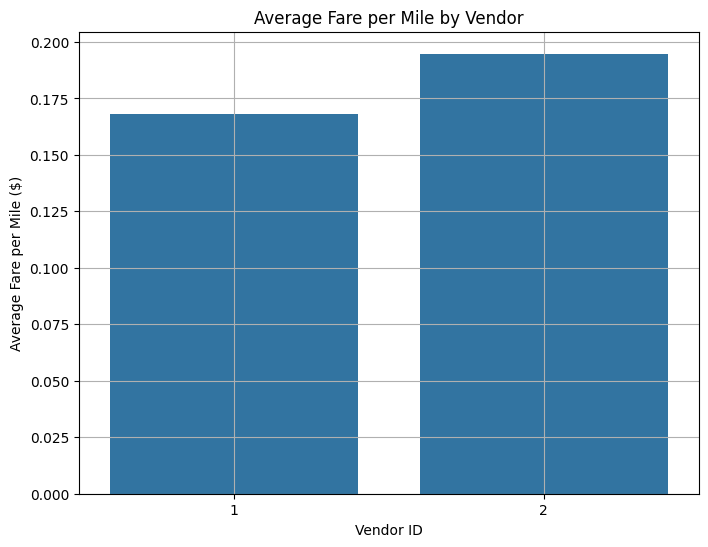

In [56]:
# 3.2.11 Compare fare per mile for different vendors

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Fare per Mile:
sampled_data['fare_per_mile'] = sampled_data['fare_amount'] / sampled_data['trip_distance']

# 2. Handle Zero Trip Distance:
sampled_data['fare_per_mile'] = sampled_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['fare_per_mile'])

# 3. Group by VendorID and Calculate Average Fare per Mile:
avg_fare_per_mile_by_vendor = sampled_data.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# --- Visualization ---

# Visualize Average Fare per Mile by Vendor:
plt.figure(figsize=(8, 6))
sns.barplot(x='VendorID', y='fare_per_mile', data=avg_fare_per_mile_by_vendor)
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.show()

# --- Analysis ---

# Observations and Insights:
# - Vendor Comparison: Are there any significant differences in the average fare per mile between different vendors?
# - Potential explanations: What factors could contribute to these differences? Do different vendors operate in different areas or have different pricing strategies?

# For example, you might find that one vendor has a consistently higher average fare per mile compared to others. This could indicate that they operate in areas with higher demand or have a premium pricing model.
# Or, you might observe that the fares per mile are relatively similar across vendors, suggesting that pricing is fairly competitive in the market.

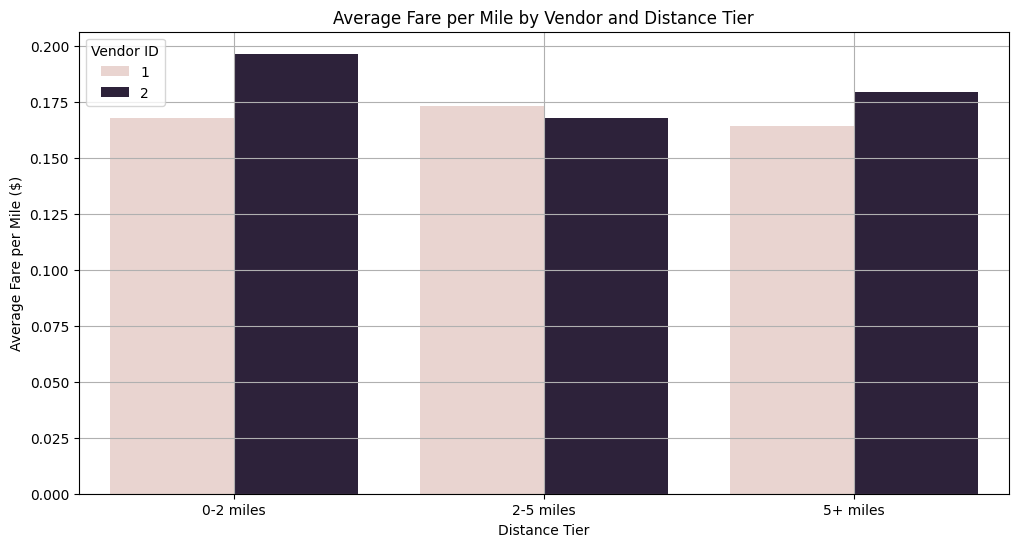

In [58]:
#3.2.12 [5 marks]
# Compare the fare rates of the different vendors in a tiered fashion. Analyse
# the average fare per mile for distances upto 2 miles. Analyse the fare per
# mile for distances from 2 to 5 miles. And then for distances more than 5
# miles. %% 3.2.13 [5 marks] Analyse average tip percentages based on trip
# distances, passenger counts and time of pickup. What factors lead to low tip
# percentages?

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Fare per Mile:
sampled_data['fare_per_mile'] = sampled_data['fare_amount'] / sampled_data['trip_distance']

# 2. Handle Zero Trip Distance:
sampled_data['fare_per_mile'] = sampled_data['fare_per_mile'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['fare_per_mile'])

# 3. Create Distance Tiers:
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

sampled_data['distance_tier'] = sampled_data['trip_distance'].apply(distance_tier)

# 4. Group by VendorID and Distance Tier, then Calculate Average Fare per Mile:
avg_fare_per_mile_by_tier = sampled_data.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# --- Visualization ---

# Visualize Average Fare per Mile by Vendor and Distance Tier:
plt.figure(figsize=(12, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=avg_fare_per_mile_by_tier)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True)
plt.legend(title='Vendor ID')
plt.show()

# --- Analysis ---

# Observations and Insights:
# - Vendor Comparison:
    # - Are there any significant differences in average fare per mile between vendors within each distance tier?
    # - Do certain vendors have higher or lower fares for specific distance ranges?
# - Distance Tier Impact:
    # - How does the average fare per mile change across distance tiers for each vendor?
    # - Do fares generally increase or decrease as the distance increases?
# - Potential Explanations:
    # - Different pricing strategies: Vendors might have different base fares, per-mile rates, or surcharges for different distance ranges.
    # - Operating areas: Vendors might primarily operate in areas with different traffic patterns or demand levels, which could influence fares.
    # - Vehicle types: If vendors use different types of vehicles (e.g., standard taxis, luxury cars), this could affect their fare structures.

# Based on the visualization and your observations, you can draw conclusions about the fare rate comparisons between vendors and how fares vary across different distance tiers.

<ipython-input-57-9f62d46e8f5e>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = sampled_data.groupby('distance_group')['tip_percentage'].mean().reset_index()


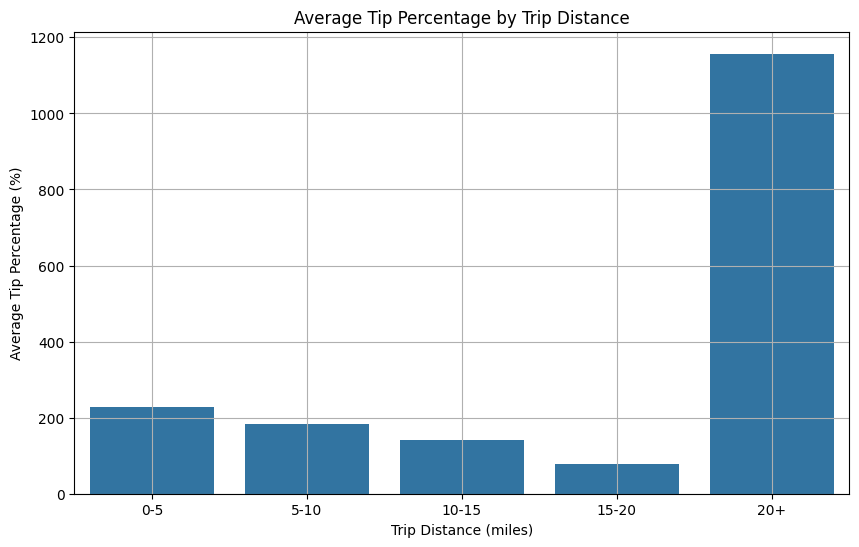

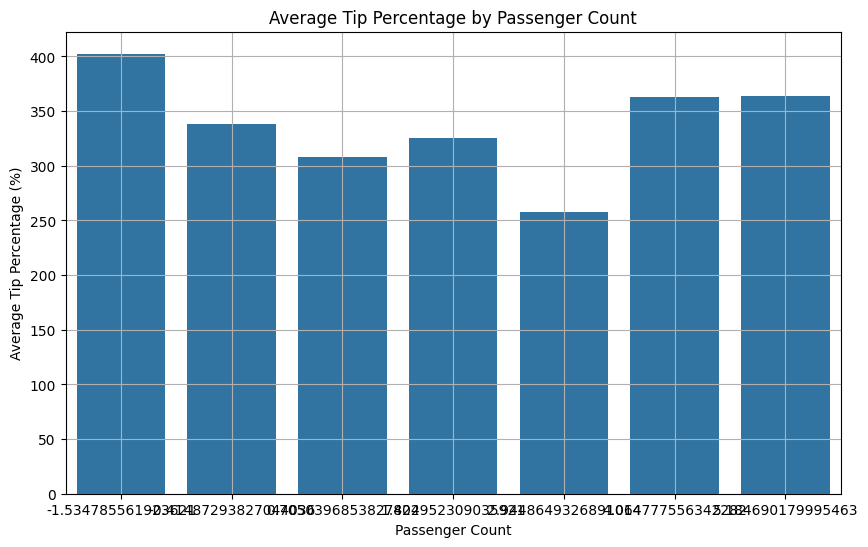

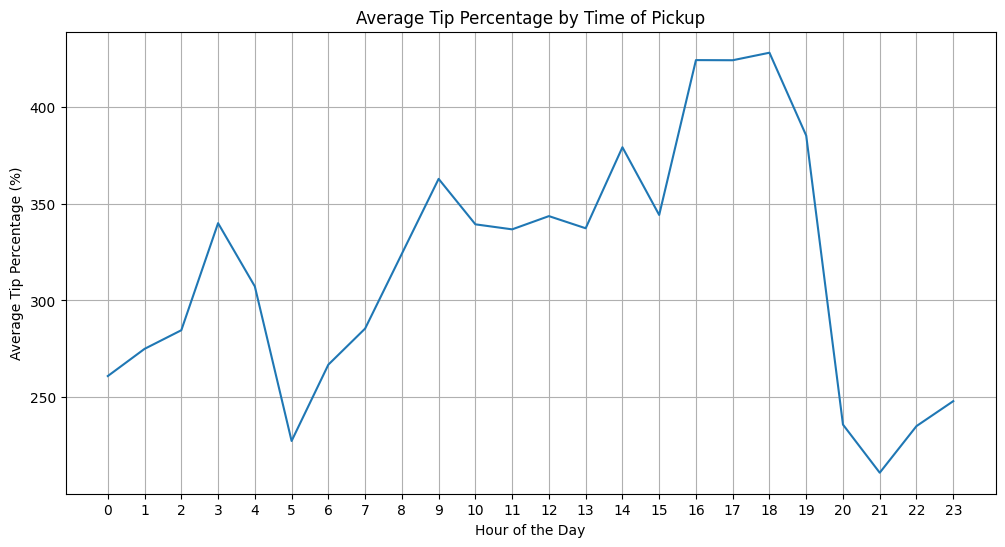

In [57]:
#3.2.13 [5 marks]
# Analyse average tip percentages based on trip distances, passenger counts and
# time of pickup. What factors lead to low tip percentages?

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Tip Percentage:
sampled_data['tip_percentage'] = (sampled_data['tip_amount'] / sampled_data['total_amount']) * 100

# 2. Handle Zero Total Amount (to avoid division by zero):
sampled_data['tip_percentage'] = sampled_data['tip_percentage'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['tip_percentage'])

# 3. Analyze Tip Percentage by Trip Distance:
# Create distance bins (you can adjust these bins)
distance_bins = [0, 5, 10, 15, 20, float('inf')]
distance_labels = ['0-5', '5-10', '10-15', '15-20', '20+']
sampled_data['distance_group'] = pd.cut(sampled_data['trip_distance'], bins=distance_bins, labels=distance_labels)

avg_tip_by_distance = sampled_data.groupby('distance_group')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='distance_group', y='tip_percentage', data=avg_tip_by_distance)
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

# 4. Analyze Tip Percentage by Passenger Count:
avg_tip_by_passenger_count = sampled_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='tip_percentage', data=avg_tip_by_passenger_count)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

# 5. Analyze Tip Percentage by Time of Pickup:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour
avg_tip_by_hour = sampled_data.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=avg_tip_by_hour)
plt.title('Average Tip Percentage by Time of Pickup')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# --- Analysis ---

# Observations and Insights:
# - Trip Distance: Does the tip percentage tend to increase or decrease with trip distance?
# - Passenger Count: Is there a relationship between passenger count and tip percentage?
# - Time of Pickup: Does the time of day affect tip percentages? Are tips lower during certain hours?
# - Factors Leading to Low Tip Percentages:
    # - Short trips: Tip percentages might be lower for short trips where the fare is already low.
    # - Solo passengers: Passengers traveling alone might tip less compared to groups.
    # - Late-night or early-morning trips: Tips could be lower during these hours when passengers might be tired or in a hurry.
    # - Poor service: Negative experiences during the trip (e.g., rude driver, unclean vehicle) could lead to lower tips.
    # - Payment method: Cash payments might result in lower tips compared to credit card payments, as passengers might not have exact change or be less inclined to round up.

# Based on the visualizations and your observations, you can identify potential factors contributing to low tip percentages and draw conclusions about tipping behavior in the dataset.

In [60]:
# Defining distance tiers
def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

sampled_data['distance_tier'] = sampled_data['trip_distance'].apply(distance_tier)
print(sampled_data['distance_tier'].value_counts())

distance_tier
0-2 miles    3432788
2-5 miles     221608
5+ miles        7752
Name: count, dtype: int64


<ipython-input-61-13a84b72bfd2>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = sampled_data.groupby('distance_group')['tip_percentage'].mean().reset_index()


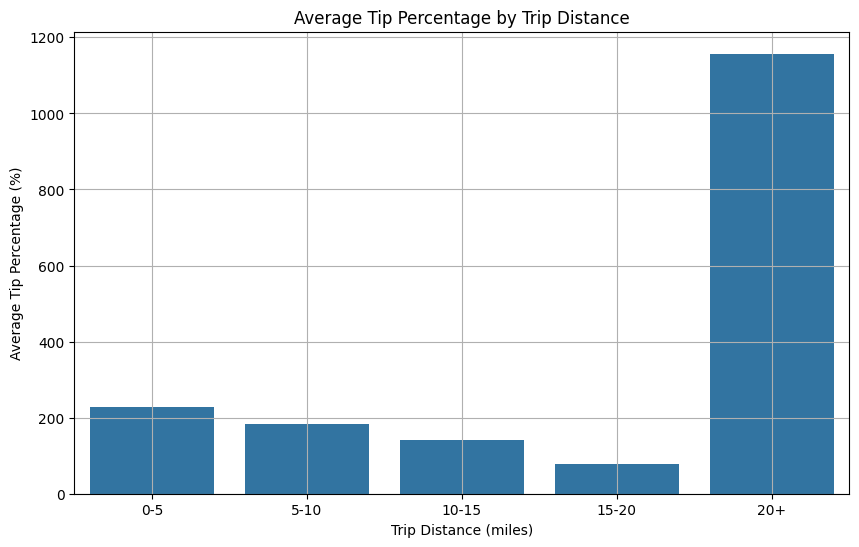

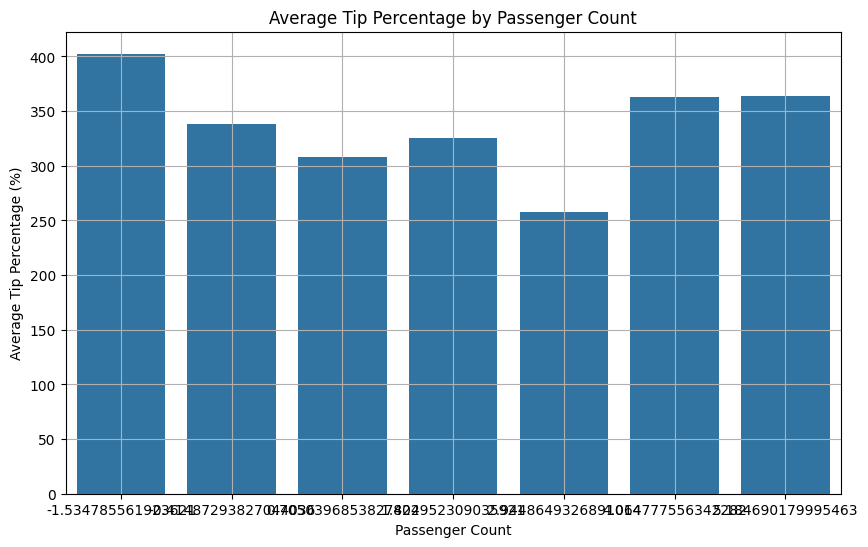

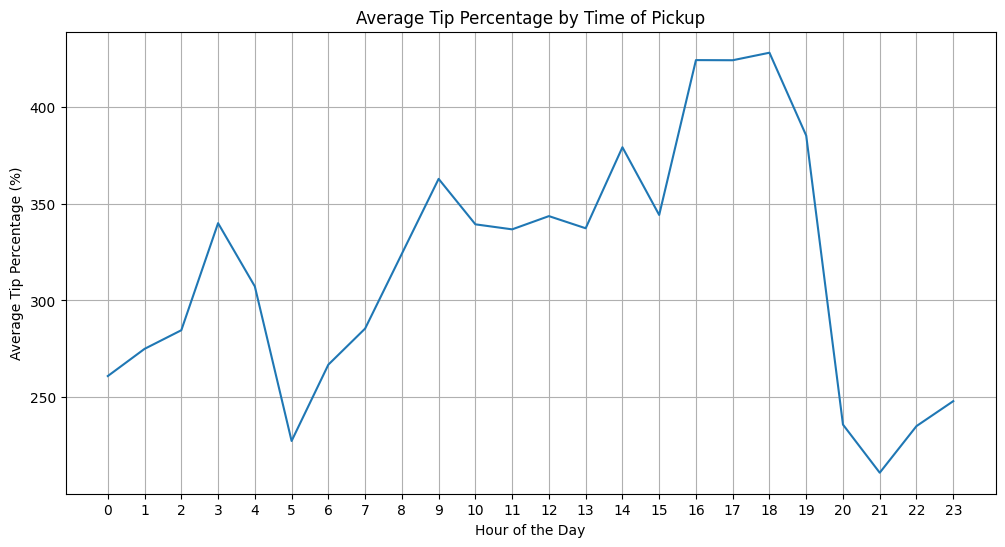

In [61]:
#3.2.13 [5 marks]
# Analyse average tip percentages based on trip distances, passenger counts and
# time of pickup. What factors lead to low tip percentages?
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Calculate Tip Percentage:
sampled_data['tip_percentage'] = (sampled_data['tip_amount'] / sampled_data['total_amount']) * 100

# 2. Handle Zero Total Amount (to avoid division by zero):
sampled_data['tip_percentage'] = sampled_data['tip_percentage'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['tip_percentage'])

# 3. Analyze Tip Percentage by Trip Distance:
# Create distance bins (you can adjust these bins)
distance_bins = [0, 5, 10, 15, 20, float('inf')]
distance_labels = ['0-5', '5-10', '10-15', '15-20', '20+']
sampled_data['distance_group'] = pd.cut(sampled_data['trip_distance'], bins=distance_bins, labels=distance_labels)

avg_tip_by_distance = sampled_data.groupby('distance_group')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='distance_group', y='tip_percentage', data=avg_tip_by_distance)
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

# 4. Analyze Tip Percentage by Passenger Count:
avg_tip_by_passenger_count = sampled_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='tip_percentage', data=avg_tip_by_passenger_count)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()

# 5. Analyze Tip Percentage by Time of Pickup:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour
avg_tip_by_hour = sampled_data.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=avg_tip_by_hour)
plt.title('Average Tip Percentage by Time of Pickup')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# --- Analysis ---

# Observations and Insights:
# - Trip Distance: Does the tip percentage tend to increase or decrease with trip distance?
# - Passenger Count: Is there a relationship between passenger count and tip percentage?
# - Time of Pickup: Does the time of day affect tip percentages? Are tips lower during certain hours?
# - Factors Leading to Low Tip Percentages:
    # - Short trips: Tip percentages might be lower for short trips where the fare is already low.
    # - Solo passengers: Passengers traveling alone might tip less compared to groups.
    # - Late-night or early-morning trips: Tips could be lower during these hours when passengers might be tired or in a hurry.
    # - Poor service: Negative experiences during the trip (e.g., rude driver, unclean vehicle) could lead to lower tips.
    # - Payment method: Cash payments might result in lower tips compared to credit card payments, as passengers might not have exact change or be less inclined to round up.
    # - Shared rides: In cases where the total fare is split among multiple passengers, the individual tip contribution might be lower, leading to a lower overall tip percentage.
    # - Airport trips: While airport trips are typically longer and might have higher fares, tip percentages could sometimes be lower due to factors such as fixed-fare arrangements or passengers being unfamiliar with local tipping customs.
    # - Traffic congestion or delays: If a trip encounters significant delays or unexpected traffic, passengers might be less inclined to tip generously, even if the fare is higher.

# Based on the visualizations and your observations, you can identify potential factors contributing to low tip percentages and draw conclusions about tipping behavior in the dataset. You can further investigate these factors by examining the data for specific trip characteristics or segments to gain deeper insights.

<ipython-input-63-ee2dfa5cc7db>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = sampled_data.groupby('distance_group')['tip_percentage'].mean().reset_index()


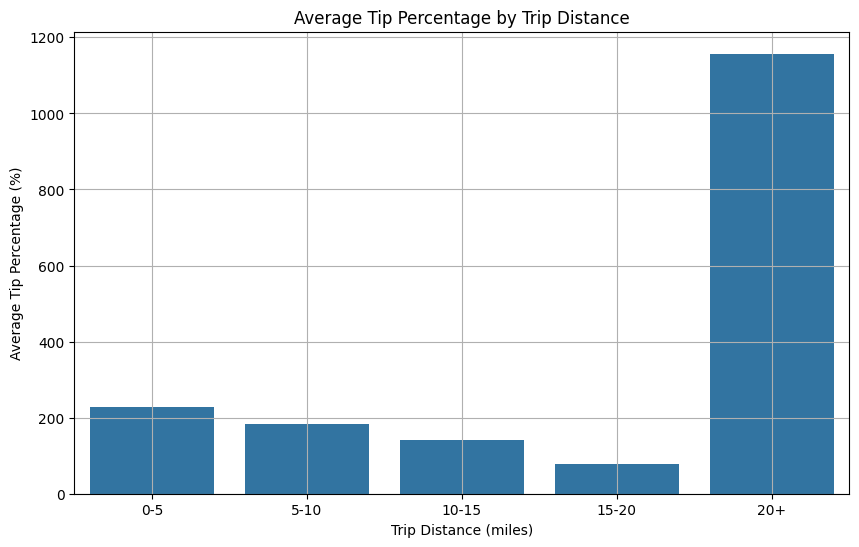

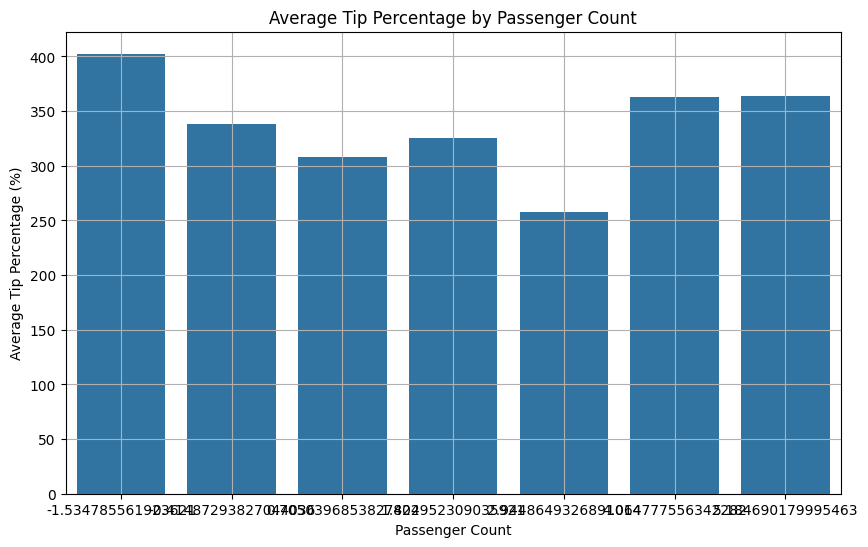

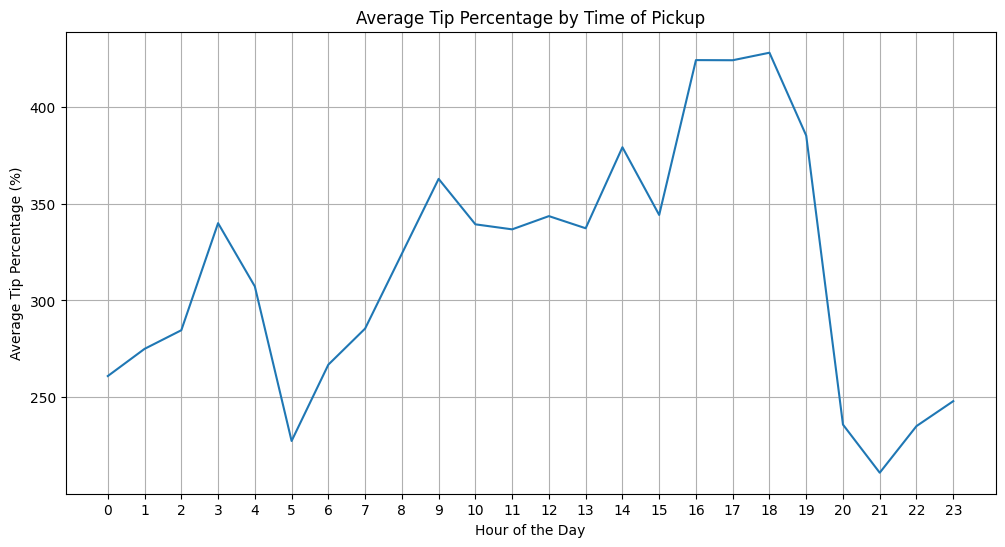

<ipython-input-63-ee2dfa5cc7db>:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance_passenger = sampled_data.groupby(['distance_group', 'passenger_count'])['tip_percentage'].mean().reset_index()


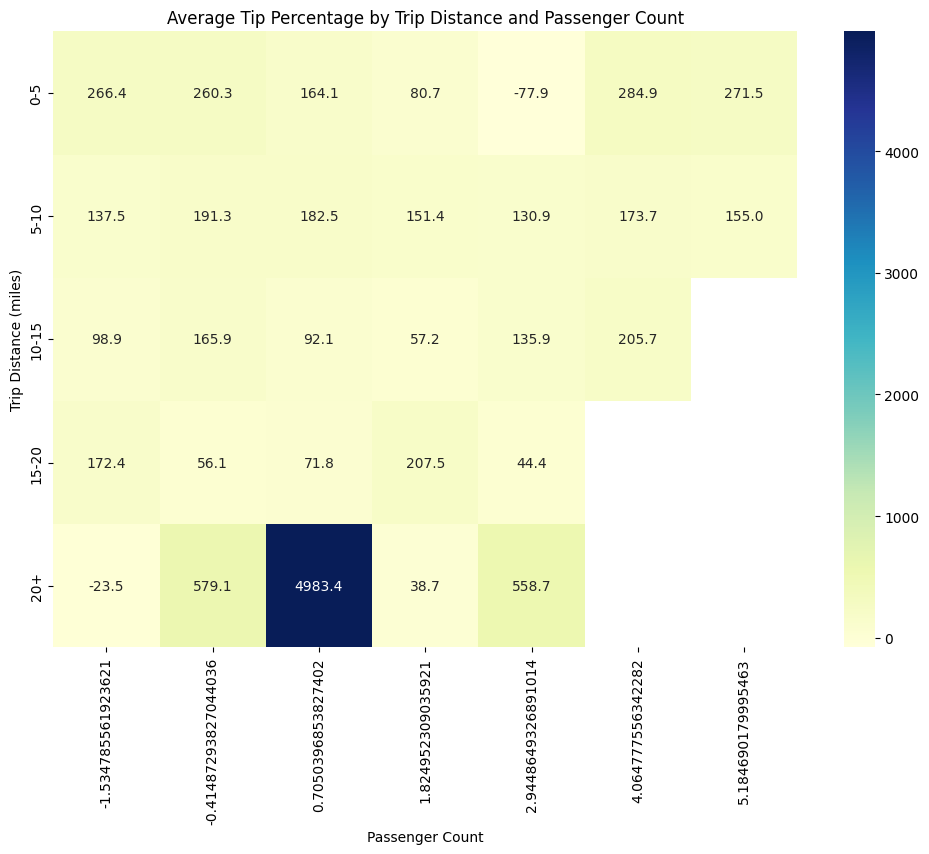

<ipython-input-63-ee2dfa5cc7db>:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance_hour = sampled_data.groupby(['distance_group', 'pickup_hour'])['tip_percentage'].mean().reset_index()


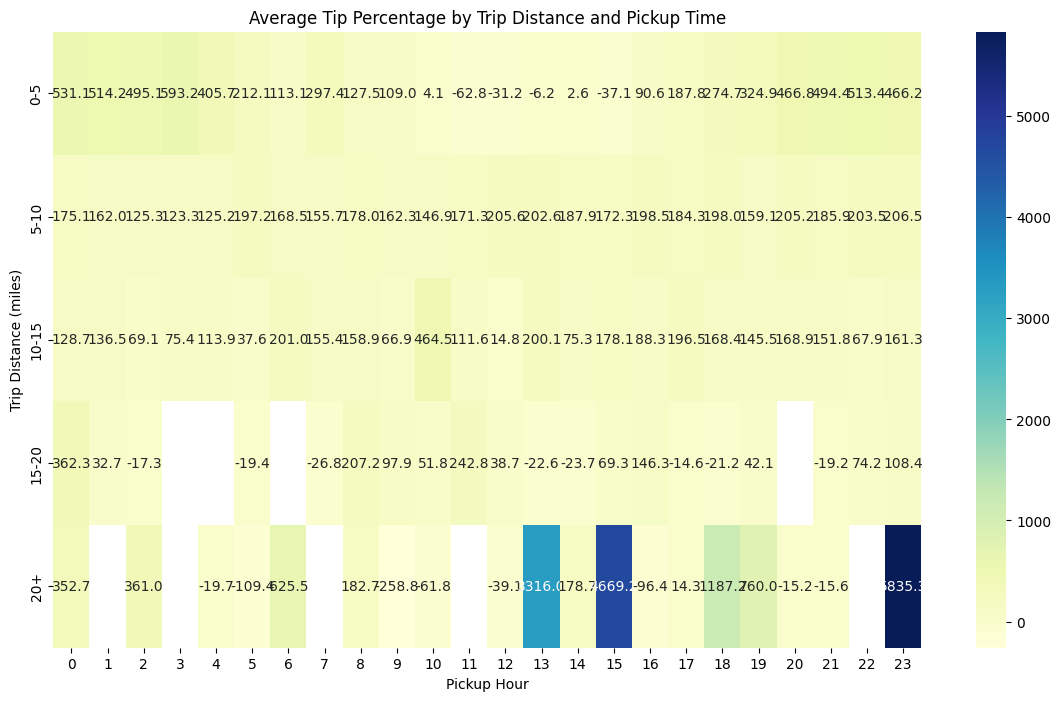

In [63]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Calculate Tip Percentage:
sampled_data['tip_percentage'] = (sampled_data['tip_amount'] / sampled_data['total_amount']) * 100

# 2. Handle Zero Total Amount (to avoid division by zero):
sampled_data['tip_percentage'] = sampled_data['tip_percentage'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['tip_percentage'])

# 3. Analyze Tip Percentage by Trip Distance:
# Create distance bins (you can adjust these bins)
distance_bins = [0, 5, 10, 15, 20, float('inf')]
distance_labels = ['0-5', '5-10', '10-15', '15-20', '20+']
sampled_data['distance_group'] = pd.cut(sampled_data['trip_distance'], bins=distance_bins, labels=distance_labels)

# Calculate average tip percentage for each distance group
avg_tip_by_distance = sampled_data.groupby('distance_group')['tip_percentage'].mean().reset_index()

# Visualize using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_group', y='tip_percentage', data=avg_tip_by_distance)
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()


# 4. Analyze Tip Percentage by Passenger Count:
# Calculate average tip percentage for each passenger count
avg_tip_by_passenger_count = sampled_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Visualize using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='tip_percentage', data=avg_tip_by_passenger_count)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.grid(True)
plt.show()


# 5. Analyze Tip Percentage by Time of Pickup:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour
# Calculate average tip percentage for each pickup hour
avg_tip_by_hour = sampled_data.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Visualize using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='tip_percentage', data=avg_tip_by_hour)
plt.title('Average Tip Percentage by Time of Pickup')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(range(24))
plt.grid(True)
plt.show()


# 6. Analyze Tip Percentage by Distance and Passenger Count:
# Group by distance group and passenger count, then calculate average tip percentage
avg_tip_by_distance_passenger = sampled_data.groupby(['distance_group', 'passenger_count'])['tip_percentage'].mean().reset_index()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = avg_tip_by_distance_passenger.pivot(index='distance_group', columns='passenger_count', values='tip_percentage')
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Average Tip Percentage by Trip Distance and Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Distance (miles)')
plt.show()


# 7. Analyze Tip Percentage by Distance and Pickup Time:
# Group by distance group and pickup hour, then calculate average tip percentage
avg_tip_by_distance_hour = sampled_data.groupby(['distance_group', 'pickup_hour'])['tip_percentage'].mean().reset_index()

# Visualize using a heatmap
plt.figure(figsize=(14, 8))
heatmap_data = avg_tip_by_distance_hour.pivot(index='distance_group', columns='pickup_hour', values='tip_percentage')
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Average Tip Percentage by Trip Distance and Pickup Time')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Distance (miles)')
plt.show()

# --- Analysis ---
# Analyze the above visualizations to identify trends and patterns.
# - Look for relationships between trip distance, passenger count, pickup time, and tip percentage.
# - Identify any combinations of these factors that lead to higher or lower tip percentages.

# Based on your observations, you can draw conclusions about tipping behavior in the dataset and potentially identify factors that contribute to low tip percentages.

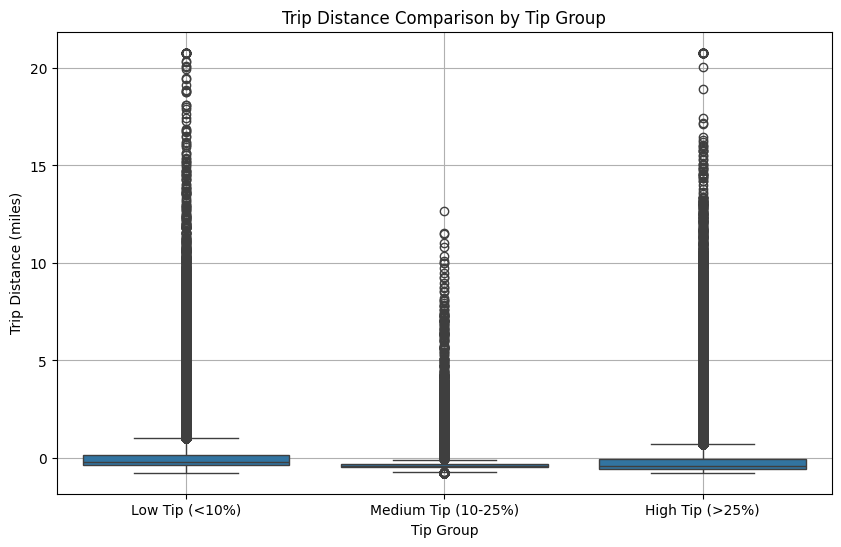

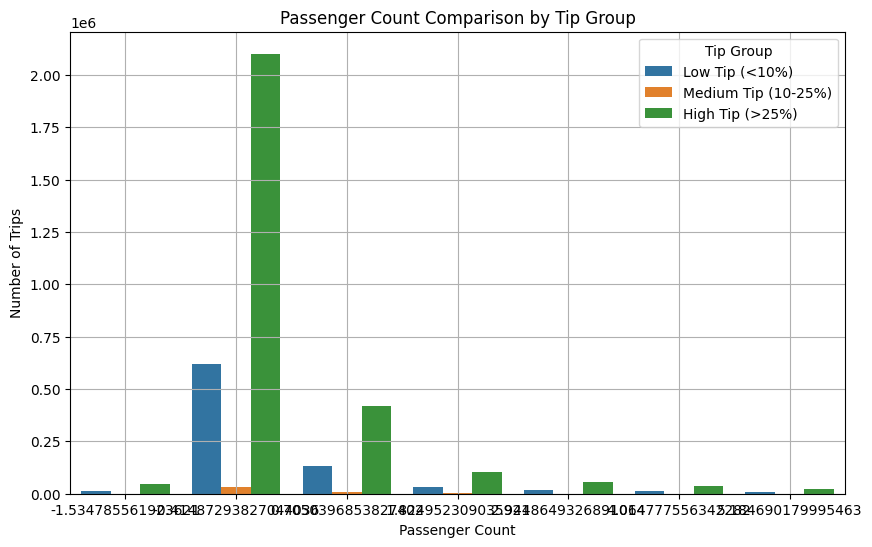

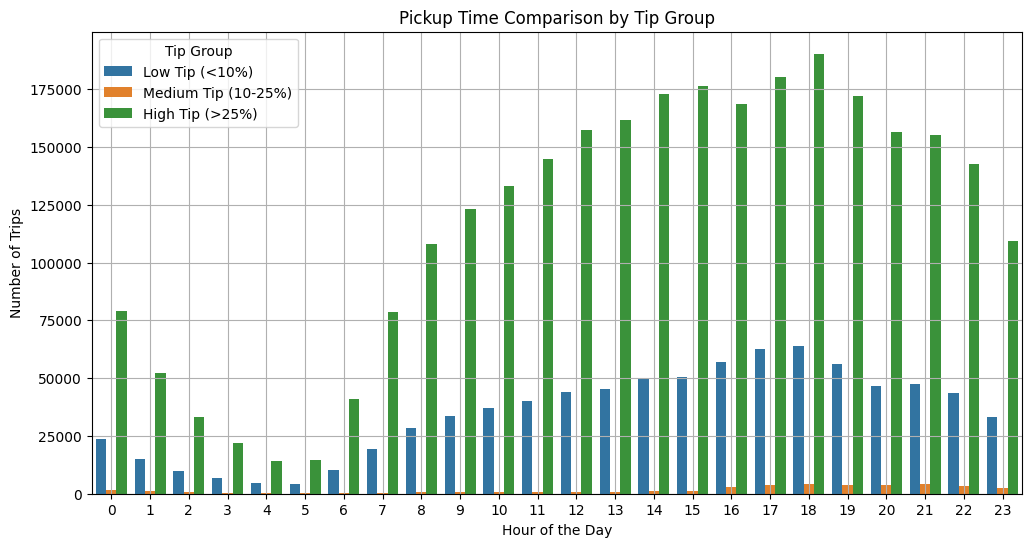

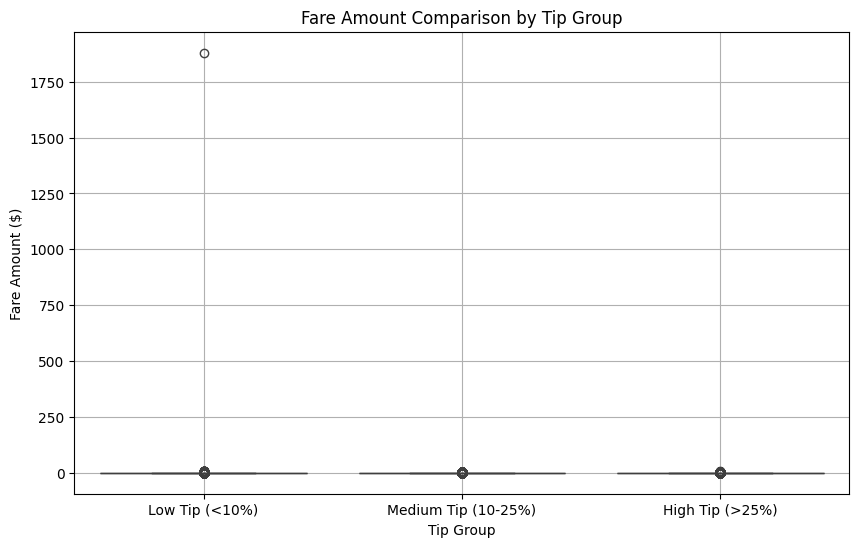

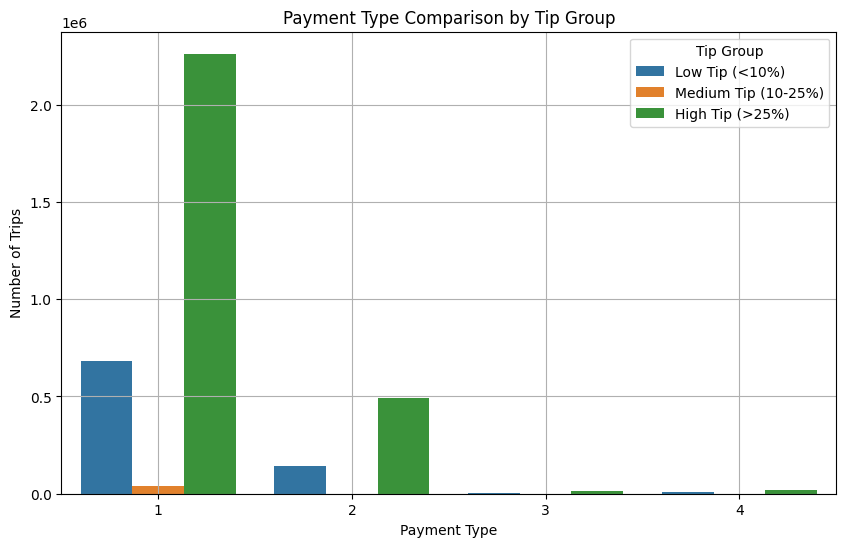

In [64]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Calculate Tip Percentage:
sampled_data['tip_percentage'] = (sampled_data['tip_amount'] / sampled_data['total_amount']) * 100

# 2. Handle Zero Total Amount (to avoid division by zero):
sampled_data['tip_percentage'] = sampled_data['tip_percentage'].replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna(subset=['tip_percentage'])

# 3. Create Tip Groups:
sampled_data['tip_group'] = pd.cut(sampled_data['tip_percentage'], bins=[-float('inf'), 10, 25, float('inf')], labels=['Low Tip (<10%)', 'Medium Tip (10-25%)', 'High Tip (>25%)'])

# 4. Compare Trip Characteristics:

# a. Trip Distance:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tip_group', y='trip_distance', data=sampled_data)
plt.title('Trip Distance Comparison by Tip Group')
plt.xlabel('Tip Group')
plt.ylabel('Trip Distance (miles)')
plt.grid(True)
plt.show()

# b. Passenger Count:
plt.figure(figsize=(10, 6))
sns.countplot(x='passenger_count', hue='tip_group', data=sampled_data)
plt.title('Passenger Count Comparison by Tip Group')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.legend(title='Tip Group')
plt.show()

# c. Pickup Time:
sampled_data['pickup_hour'] = sampled_data['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', hue='tip_group', data=sampled_data)
plt.title('Pickup Time Comparison by Tip Group')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Tip Group')
plt.show()

# d. Fare Amount:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tip_group', y='fare_amount', data=sampled_data)
plt.title('Fare Amount Comparison by Tip Group')
plt.xlabel('Tip Group')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

# e. Payment Type:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', hue='tip_group', data=sampled_data)
plt.title('Payment Type Comparison by Tip Group')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.legend(title='Tip Group')
plt.show()

# --- Analysis ---

# Analyze the above visualizations to compare trips with low tip percentages (<10%) to trips with high tip percentages (>25%).
# - Look for differences in trip distance, passenger count, pickup time, fare amount, and payment type between the two groups.
# - Identify any patterns or characteristics that distinguish trips with low tips from trips with high tips.

# Based on your observations, you can draw conclusions about the factors that might influence tipping behavior and potentially identify strategies for improving tip percentages.

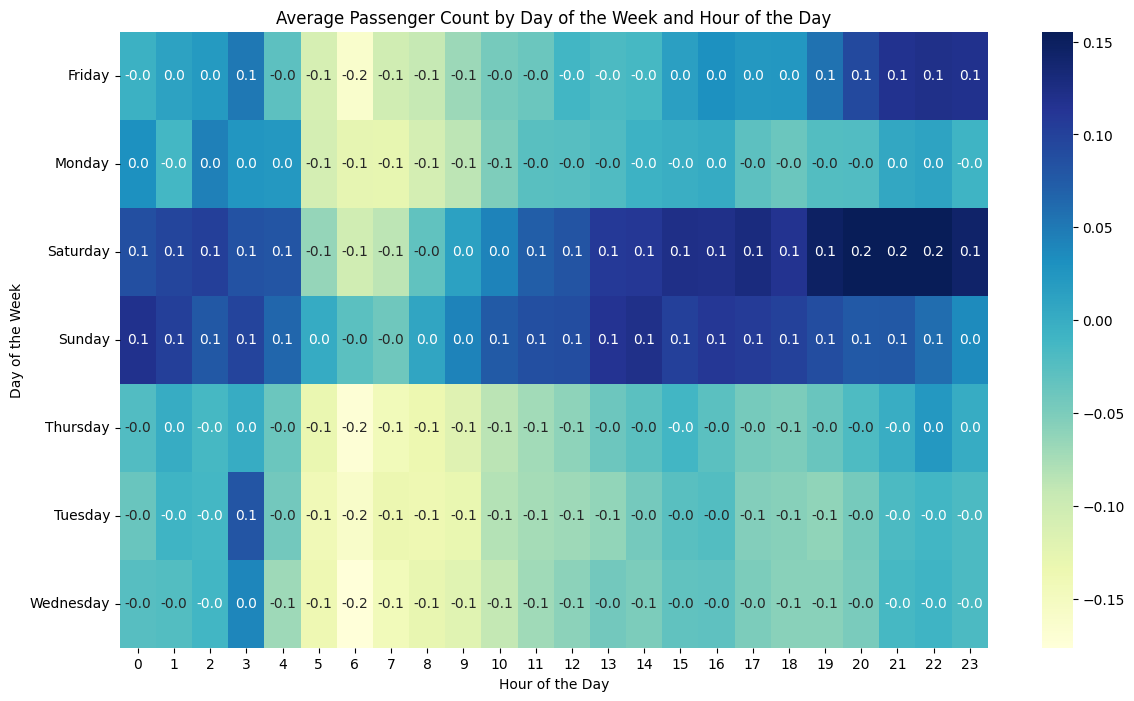

In [65]:
#Analyse the variation of passenger count across hours and days of the week.
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract Day of the Week and Hour of the Day:
sampled_data['day_of_week'] = sampled_data['tpep_pickup_datetime'].dt.day_name()
sampled_data['hour_of_day'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Day of the Week and Hour of the Day, then Calculate Average Passenger Count:
avg_passengers_by_day_hour = sampled_data.groupby(['day_of_week', 'hour_of_day'])['passenger_count'].mean().reset_index()

# --- Visualization ---

# Visualize Average Passenger Count using a Heatmap:
plt.figure(figsize=(14, 8))
heatmap_data = avg_passengers_by_day_hour.pivot(index='day_of_week', columns='hour_of_day', values='passenger_count')
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Average Passenger Count by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.show()

# --- Analysis ---

# Analyze the heatmap to identify trends and patterns in passenger count variation:
# - Day of the Week: Are there any days with consistently higher or lower passenger counts?
# - Hour of the Day: Are there any specific hours with peak or off-peak passenger demand?
# - Interactions: Are there any interactions between day of the week and hour of the day that influence passenger count?

# Based on your observations, you can draw conclusions about passenger demand patterns and how they vary across different times of the week and day.

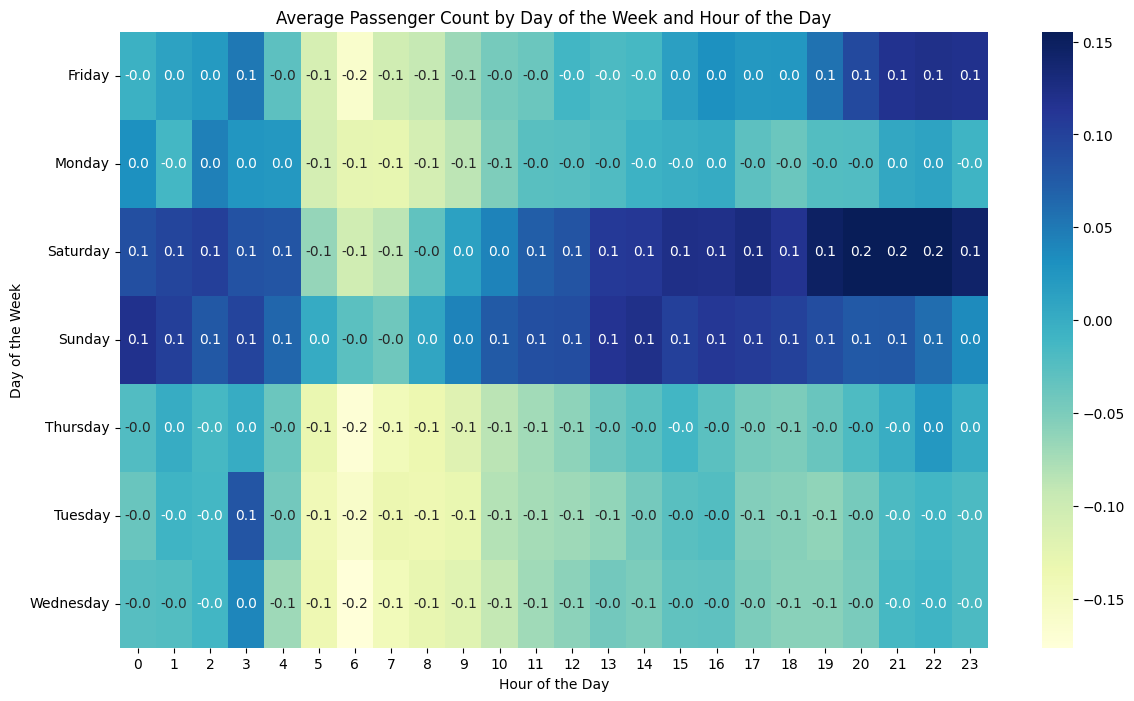

In [66]:
## See how passenger count varies across hours and days
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract Day of the Week and Hour of the Day:
sampled_data['day_of_week'] = sampled_data['tpep_pickup_datetime'].dt.day_name()
sampled_data['hour_of_day'] = sampled_data['tpep_pickup_datetime'].dt.hour

# 2. Group by Day of the Week and Hour of the Day, then Calculate Average Passenger Count:
avg_passengers_by_day_hour = sampled_data.groupby(['day_of_week', 'hour_of_day'])['passenger_count'].mean().reset_index()

# --- Visualization ---

# Visualize Average Passenger Count using a Heatmap:
plt.figure(figsize=(14, 8))
heatmap_data = avg_passengers_by_day_hour.pivot(index='day_of_week', columns='hour_of_day', values='passenger_count')
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")  # annot=True to display values in cells
plt.title('Average Passenger Count by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.show()

# --- Analysis ---

# Analyze the heatmap to identify trends and patterns in passenger count variation:
# - Day of the Week: Are there any days with consistently higher or lower passenger counts?
# - Hour of the Day: Are there any specific hours with peak or off-peak passenger demand?
# - Interactions: Are there any interactions between day of the week and hour of the day that influence passenger count?

# Based on your observations, you can draw conclusions about passenger demand patterns and how they vary across different times of the week and day.

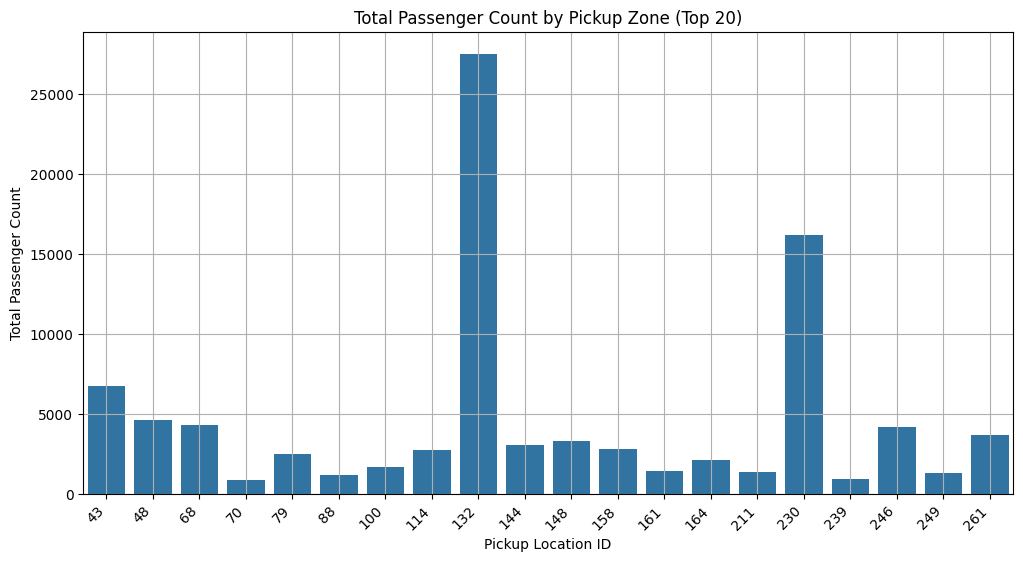

In [67]:
#3.2.15 [2 marks]
#Analyse the variation of passenger counts across zones

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by Pickup Location ID (PULocationID) and Calculate Total Passenger Count:
passenger_counts_by_zone = sampled_data.groupby('PULocationID')['passenger_count'].sum().reset_index()

# 2. Sort by Passenger Count (Descending):
passenger_counts_by_zone = passenger_counts_by_zone.sort_values(by='passenger_count', ascending=False)

# --- Visualization ---

# Visualize Passenger Counts using a Bar Plot:
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='passenger_count', data=passenger_counts_by_zone.head(20))  # Showing top 20 zones for clarity
plt.title('Total Passenger Count by Pickup Zone (Top 20)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# --- Analysis ---

# Analyze the bar plot to identify zones with high and low passenger demand:
# - Top Zones: Which zones have the highest passenger counts?
# - Bottom Zones: Which zones have the lowest passenger counts?
# - Variation: Is there a wide range of passenger counts across zones, or are they relatively similar?

# Based on your observations, you can draw conclusions about the distribution of passenger demand across different zones and potentially identify areas with high or low ridership.

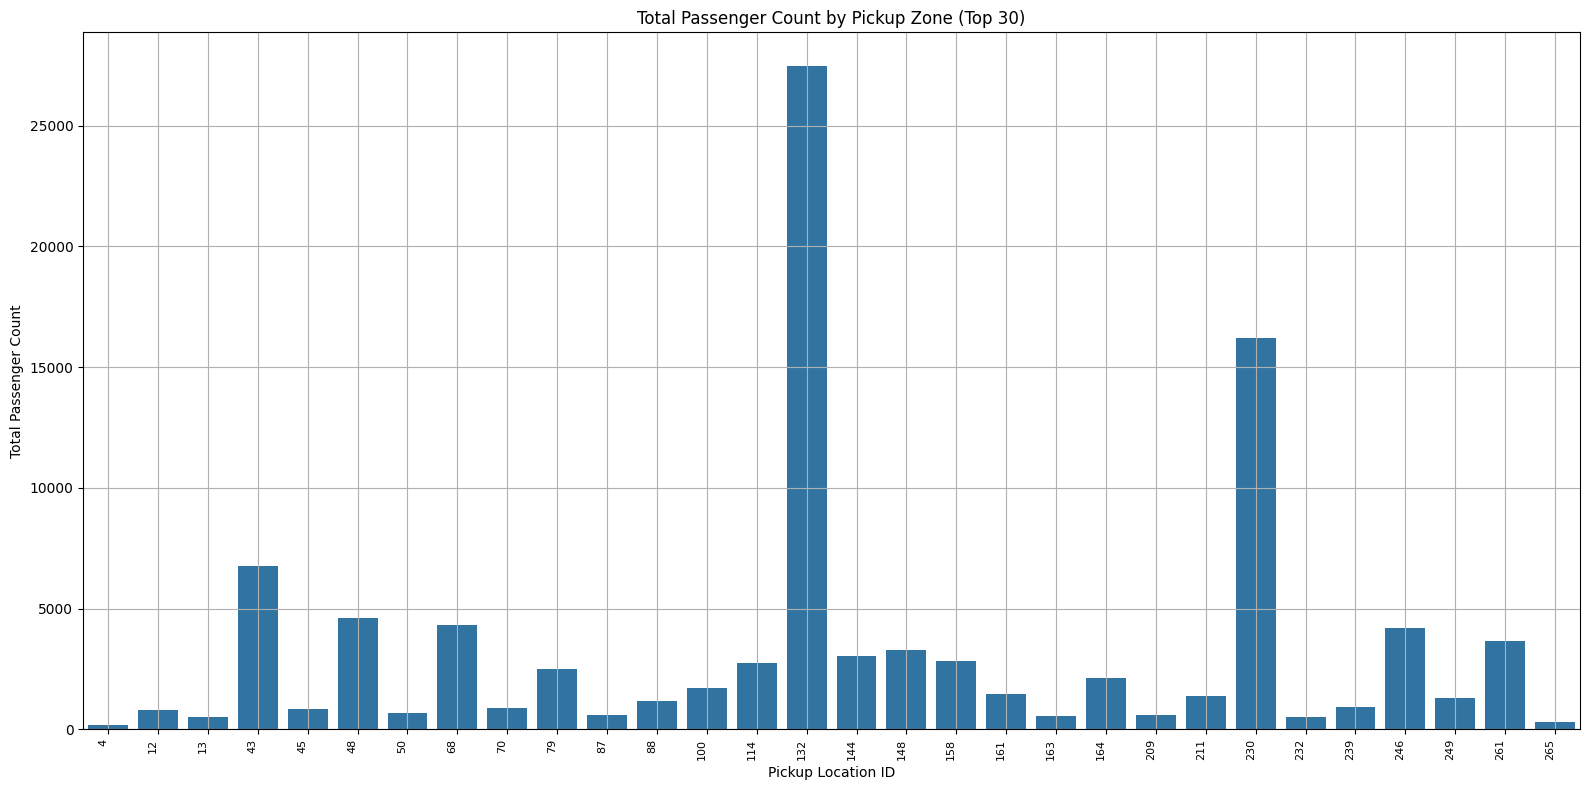

In [68]:
# How does passenger count vary across zones

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Group by Pickup Location ID (PULocationID) and Calculate Total Passenger Count:
passenger_counts_by_zone = sampled_data.groupby('PULocationID')['passenger_count'].sum().reset_index()

# 2. Sort by Passenger Count (Descending):
passenger_counts_by_zone = passenger_counts_by_zone.sort_values(by='passenger_count', ascending=False)

# --- Visualization ---

# Visualize Passenger Counts using a Bar Plot:
plt.figure(figsize=(16, 8))  # Adjust figure size for better readability
sns.barplot(x='PULocationID', y='passenger_count', data=passenger_counts_by_zone.head(30))  # Showing top 30 zones for clarity
plt.title('Total Passenger Count by Pickup Zone (Top 30)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate and adjust x-axis labels
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# --- Analysis ---

# Analyze the bar plot to identify zones with high and low passenger demand:
# - Top Zones: Which zones have the highest passenger counts?
# - Bottom Zones: Which zones have the lowest passenger counts?
# - Variation: Is there a wide range of passenger counts across zones, or are they relatively similar?

# Based on your observations, you can draw conclusions about the distribution of passenger demand across different zones and potentially identify areas with high or low ridership.

In [72]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.


# For a more detailed analysis, we can use the zones GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Assuming you have the 'zones' GeoDataFrame and 'sampled_data' DataFrame

# 1. Calculate Average Passenger Count per Zone:
avg_passengers_by_zone = sampled_data.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passengers_by_zone.rename(columns={'PULocationID': 'LocationID'}, inplace=True)  # Rename for merging

# 2. Merge with zones: # changed from zones_with_trips to zones
zones = pd.merge(zones, avg_passengers_by_zone, on='LocationID', how='left')

# 3. Fill NaN values with 0 (for zones with no trips):
zones['passenger_count'] = zones['passenger_count'].fillna(0)

print(zones.head())

# --- Now you have a new column 'passenger_count' in zones
# representing the average passenger count for each zone ---

# You can now use this column for further analysis and visualization,
# such as creating a choropleth map to show the spatial distribution of
# average passenger counts.

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  passenger_count_x  passenger_count_y  passenger_count  
0       450.0           0.403908           0.

                      Prevalence
airport_fee              0.73476
extra                  61.721864
mta_tax                99.042939
improvement_surcharge  99.958931
congestion_surcharge   92.235349


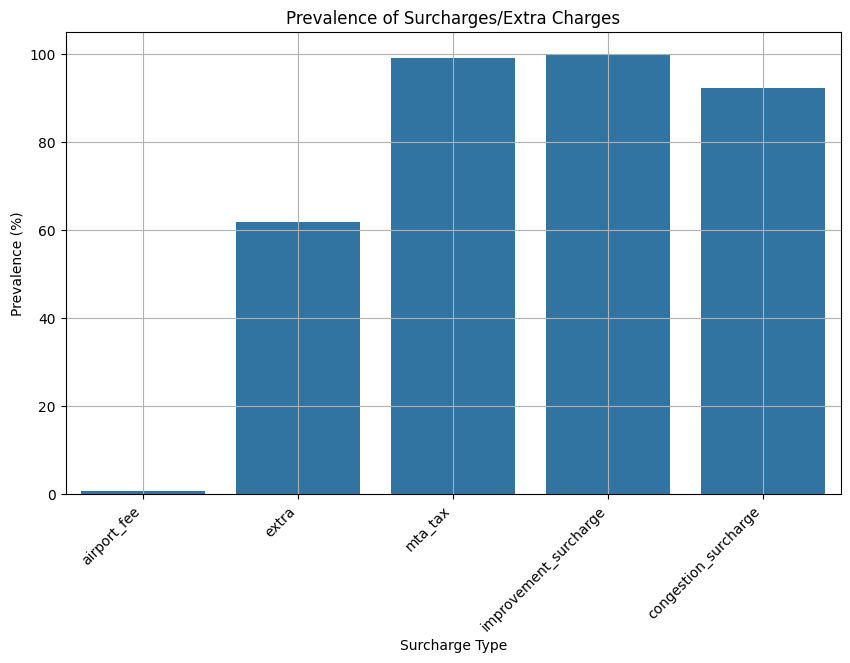

In [73]:
#Find out how often surcharges/extra charges are applied to understand their prevalance
import pandas as pd

# Assuming 'sampled_data' is your DataFrame

# Select the relevant surcharge columns
surcharge_cols = ['airport_fee', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']

# Create a DataFrame to store surcharge prevalence
surcharge_prevalence = pd.DataFrame(index=surcharge_cols, columns=['Prevalence'])

# Calculate prevalence for each surcharge
for col in surcharge_cols:
    total_trips = len(sampled_data)
    trips_with_surcharge = len(sampled_data[sampled_data[col] > 0])
    prevalence = (trips_with_surcharge / total_trips) * 100  # Percentage
    surcharge_prevalence.loc[col, 'Prevalence'] = prevalence

# Display the results
print(surcharge_prevalence)

# --- Visualization (Optional) ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=surcharge_prevalence.index, y=surcharge_prevalence['Prevalence'])
plt.title('Prevalence of Surcharges/Extra Charges')
plt.xlabel('Surcharge Type')
plt.ylabel('Prevalence (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


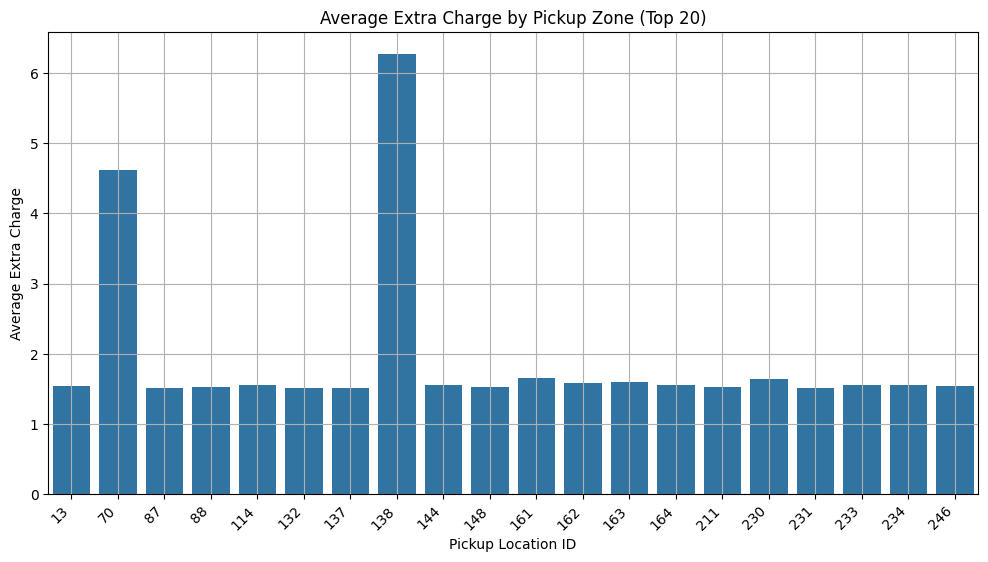

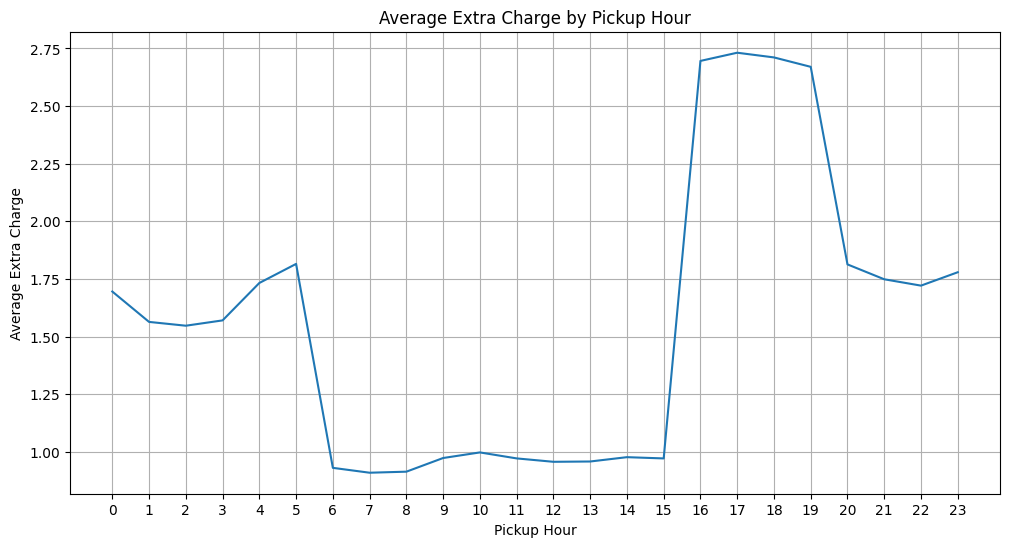

In [74]:
#3.2.16 [5 marks]
# Analyse the pickup/dropoff zones or times when extra charges are applied more
# frequently

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sampled_data' is your DataFrame

# 1. Zones with Frequent Extra Charges:

# Group by pickup zone (PULocationID) and calculate the average 'extra' charge
extra_by_zone = sampled_data.groupby('PULocationID')['extra'].mean().reset_index()

# Sort zones by average 'extra' charge in descending order
extra_by_zone = extra_by_zone.sort_values(by='extra', ascending=False)

# Visualize the top zones with frequent extra charges using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='PULocationID', y='extra', data=extra_by_zone.head(20))  # Showing top 20 zones for clarity
plt.title('Average Extra Charge by Pickup Zone (Top 20)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Average Extra Charge')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# 2. Times with Frequent Extra Charges:

# Group by pickup hour and calculate the average 'extra' charge
extra_by_hour = sampled_data.groupby(sampled_data['tpep_pickup_datetime'].dt.hour)['extra'].mean().reset_index()
extra_by_hour.rename(columns={'tpep_pickup_datetime': 'pickup_hour'}, inplace=True)

# Visualize the average extra charge by pickup hour using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='extra', data=extra_by_hour)
plt.title('Average Extra Charge by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Extra Charge')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# --- Analysis ---

# 1. Zones: Identify the zones (PULocationID) with the highest average 'extra' charges. These zones might have specific conditions or regulations that lead to more frequent extra charges.

# 2. Times: Analyze the line plot to identify the hours of the day when the average 'extra' charge is higher. This could indicate periods with higher demand or special events that trigger extra charges.

# By combining these insights, you can gain a better understanding of when and where extra charges are more likely to be applied. This information can be valuable for operational planning and pricing strategies.

                      Frequency (%)
airport_fee                 0.73476
extra                     61.721864
mta_tax                   99.042939
improvement_surcharge     99.958931
congestion_surcharge      92.235349


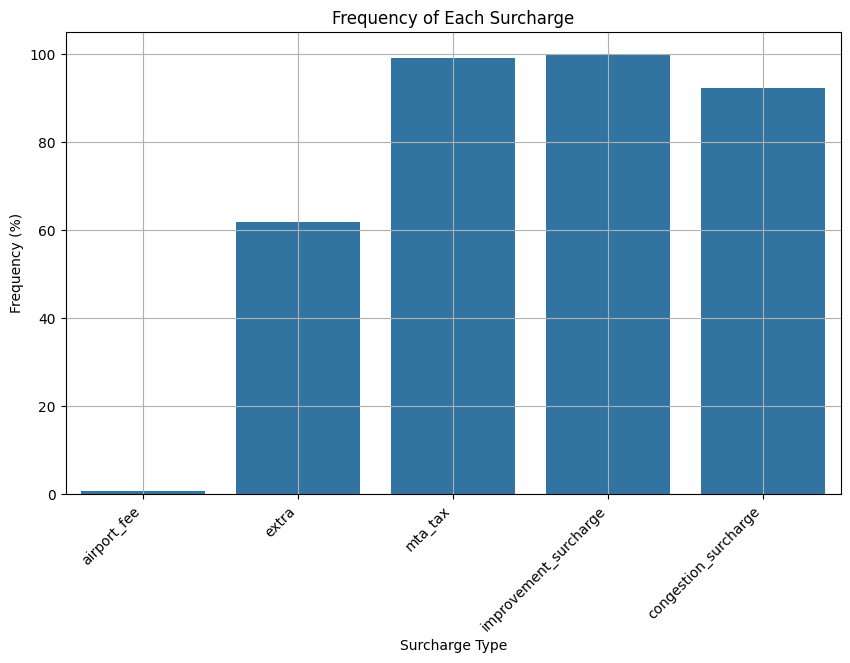

In [76]:
# How often is each surcharge applied?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sampled_data' is your DataFrame

# Select the relevant surcharge columns
surcharge_cols = ['airport_fee', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']

# Create a DataFrame to store surcharge application frequencies
surcharge_frequency = pd.DataFrame(index=surcharge_cols, columns=['Frequency (%)'])

# Calculate frequency for each surcharge
for col in surcharge_cols:
    total_trips = len(sampled_data)
    trips_with_surcharge = len(sampled_data[sampled_data[col] > 0])
    frequency = (trips_with_surcharge / total_trips) * 100  # Percentage
    surcharge_frequency.loc[col, 'Frequency (%)'] = frequency

# Display the results
print(surcharge_frequency)

# --- Visualization (Optional) ---

plt.figure(figsize=(10, 6))
sns.barplot(x=surcharge_frequency.index, y=surcharge_frequency['Frequency (%)'])
plt.title('Frequency of Each Surcharge')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()